# Advanced Statistics for Physics Analysis - RLab06

### Student 
Luca Menti

### ID
2063594

### e-mail
luca.menti@studenti.unipd.it

### Course
Physics of Data

# EXERCISE 1

## •  A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.

## • A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.


## 1) what is the probability distribution of y, the number of times the new method fails to detect the disease ?

 The probability distribution of $ y $ is binomial.

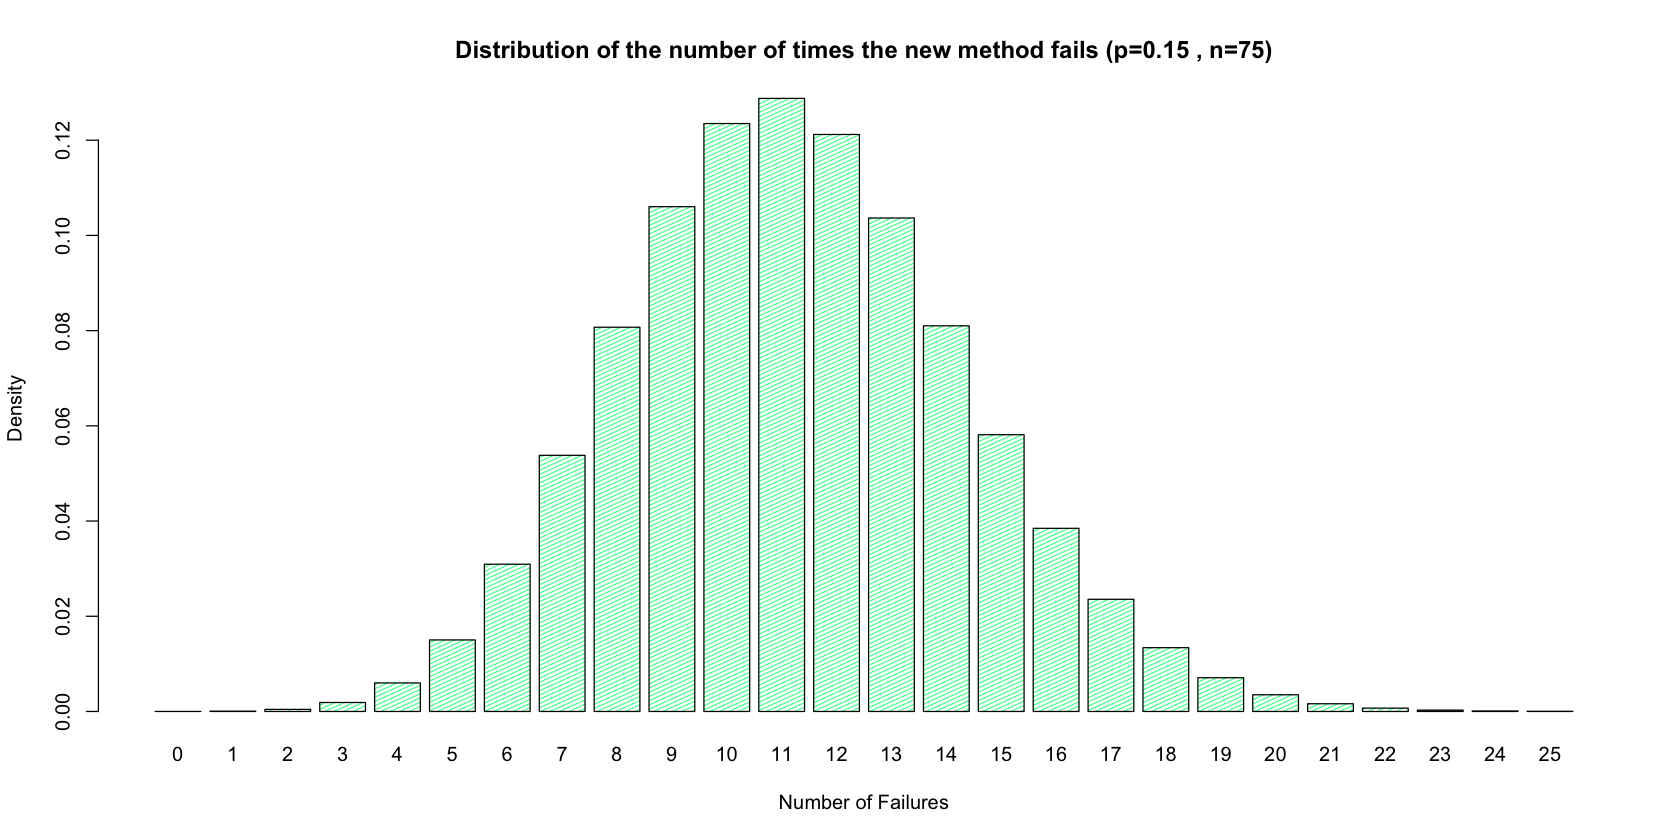

In [380]:
n<- 75
p<- 15/100
x<- 0:25
ap<- dbinom(x,n,p)
options(repr.plot.width=14, repr.plot.height=7)
barplot(ap,
        names=x,
        main="Distribution of the number of times the new method fails (p=0.15 , n=75)",
        xlab= "Number of Failures",
        ylab= "Density",
        col="seagreen1",
        density=40)

## 2) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?


 In the Frequentist approach, an unbiased estimator for the Binomial distribution is:
 $$
\hat{p_{F}} = \frac{y}{n}
$$
where $y$ is the number of successes in $n$ trials.

So in this case:
$$
\hat{p_{F}} = \frac{y}{n}=\frac{6}{75}=0.08
$$


## 3) Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

If we start with a Beta Prior with parameters $ a$ and $ b$, and then measure $ y$ number of success in n trials, the Posterior is a Beta functions with parameters:

$$
a' =a + y 
$$

$$
b' =b + n-y  
$$

Since :

$$
\hat{p_{B}} = m'=\frac{a}{a + b}
$$


while the variance is :

$$
\sigma_0 ^2 = \frac{ab}{(a+b)^2 (a+b+1)} 
$$


it can be written giving:

$$
a+b+1= \frac{m(1-m)}{ \sigma_0 ^2}
$$

$$
a+b= \frac{a}{ m}
$$

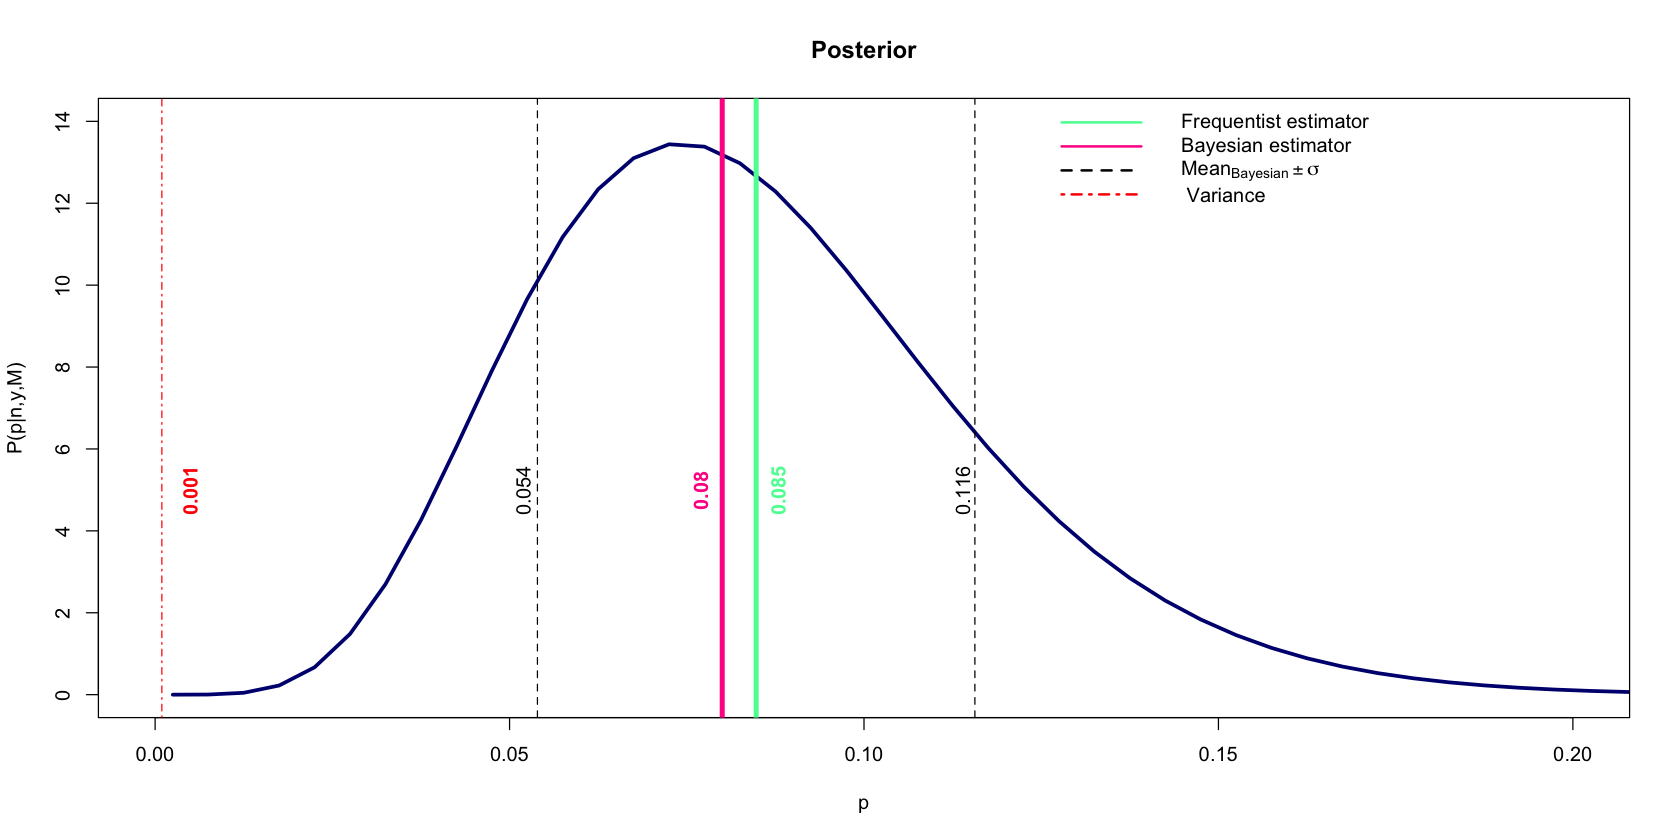

In [5]:
#values
a<- 3237/3920
b<- 18343/3920
n=75
y=6
n.sample<-200
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
#posterior
a1=a+y
b1=b+n-y
post.beta<-dbeta(x=p,a1,b1)

#mean and variance bayesian
m<-a1/(a1+b1)
var<- (a1*b1)/(((a1+b1)^2)*(a1+b1+1))
std<-sqrt(var)


#mean and variance frequentist
mf<-6/75
varf<-(mf*(1-mf))/n


#plot
options(repr.plot.width=14, repr.plot.height=7)
plot(p, post.beta,
     col="navy",
     type="l",
     lty=1,
     xlim=c(0,0.2),
     ylim=c(0,14),
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior")
abline(v=c(m,mf),col=c("seagreen1", "deeppink"), lty=c(1,1), lwd=c(4, 4))
abline(v=c(m-std,m+std),col=c("black", "black"), lty=c(2,2), lwd=c(1, 1))
abline(v=c(var),col=c("red"), lty=c(4), lwd=c(1))
text(x=round(m-std,3)-0.002,y=5,round(m-std,3),srt=90)
text(x=round(6/75,3)-0.003,y=5,round(6/75,3),srt=90, col ='deeppink', font=2)
text(x=round(m,3)+0.003,y=5,round(m,3),srt=90, col ='seagreen1', font=2)
text(x=round(m+std,3)-0.002,y=5,round(m+std,3),srt=90)
text(x=0.005,y=5,round(var,4),srt=90, col ='red', font=2)
legend(x = "topright",
       col = c("seagreen1", "deeppink","black","red"),
       lty = c(1,1,2,4),
       lwd = c(2,2,2,2),
       cex=1,
       bty="n",
       legend = c('Frequentist estimator ', 'Bayesian estimator ', expression(Mean[Bayesian] %+-% symbol(s)), " Variance"))

The distribution is asymmetric so the mean $p$ ( computed with the Bayesian approach) doesn't correspond with the peak of the distribution

## 4) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

• We wish to test $H_o$ : $p \geq p_o $ versus $ H_1$  : $p < p_o$ at a level of significance $\alpha$

In particular $H_o$ =the new test is not better than the old one, while $ H_1$= the new test is better and $p_o = 15 \% $.

• we evaluate the posterior probability of the null hypothesis, and integrate over the required region:

$$
P( H_o : p \geq p_o | y) = 1- \int _0 ^ {p_o} g(p|y) dp
$$

• we reject the null hypothesis if the posterior probability is less than $\alpha$ , the level of significance

The posterior probability of the null hypothesis is: 3.13 % 


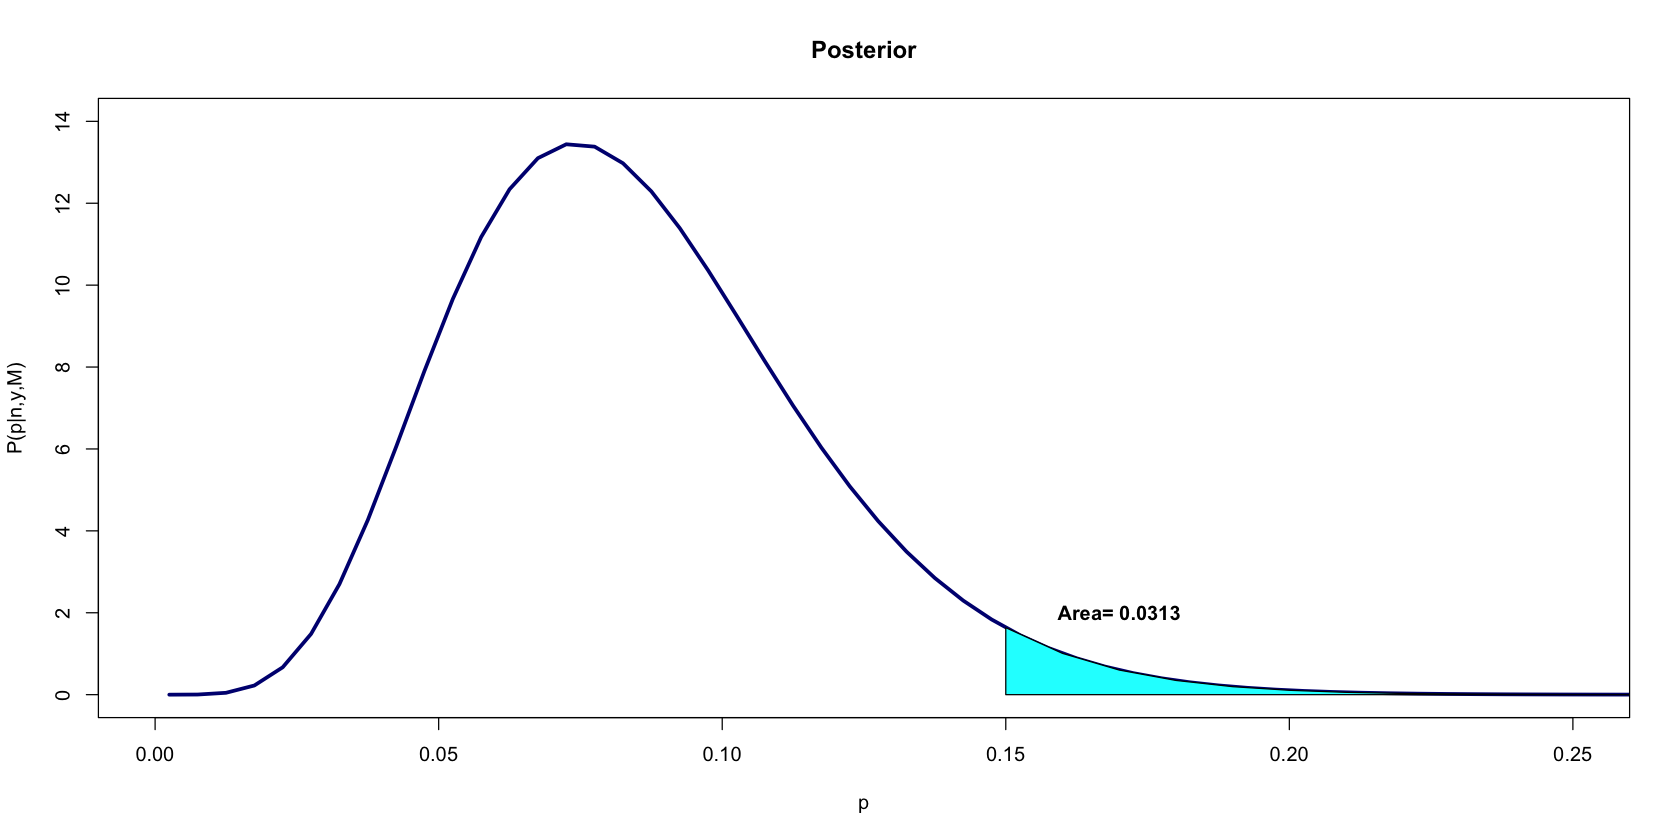

In [6]:
d<-gamma(a1+b1)
f<-(gamma(a1)*gamma(b1))
z<-d/f
E.Xru<- integrate( function(x){dbeta(x,a1,b1)},0,0.15)
E.Xru<-(1-E.Xru$value)*100
area<-E.Xru/100
cat("The posterior probability of the null hypothesis is:", round(E.Xru,2), "%", "\n")

#plot

x <- seq(0.15, 1, 0.01)
y <- dbeta(x,a1,b1)
x2 = c(0.15,x,1)
y2 = c(0,y,0)
options(repr.plot.width=14, repr.plot.height=7)
plot(p, post.beta,
     col="navy",
     type="l",
     lty=1,
     xlim=c(0,0.25),
     ylim=c(0,14),
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior")
polygon(x2,y2, col="cyan1")
text(x=0.17,y=2,labels=paste("Area=", round(area,4)), col ='black', font=2)

The result, 3.13%, is less than $ \alpha $ = 5%, therefore we can reject the null hypothesis at the 5% level of significance.

## 5) Perform the same hypothesis test in the classical frequentist way.

• setup a null hypothesis
$$
H_o : p \geq p_o 
$$

• the alternative hypothesis  is
$$
 H_1  : p < p_o
$$
• the NULL distribution of the test statistic is the sampling distribution of the test statistic, given that the NULL hypothesis is true 
$$
Binom(y | n=75, p = 0.15)
$$

• choose a level of significance : $ \alpha =5 \% $

• The rejection region is chosen so that it has a probability of $ \alpha $ under the NULL distribution (Neyman and Pearson approach), if y = 6 lies in the acceptance region $ \to $ we do not reject $H_o$

The p-value is: 0.0544

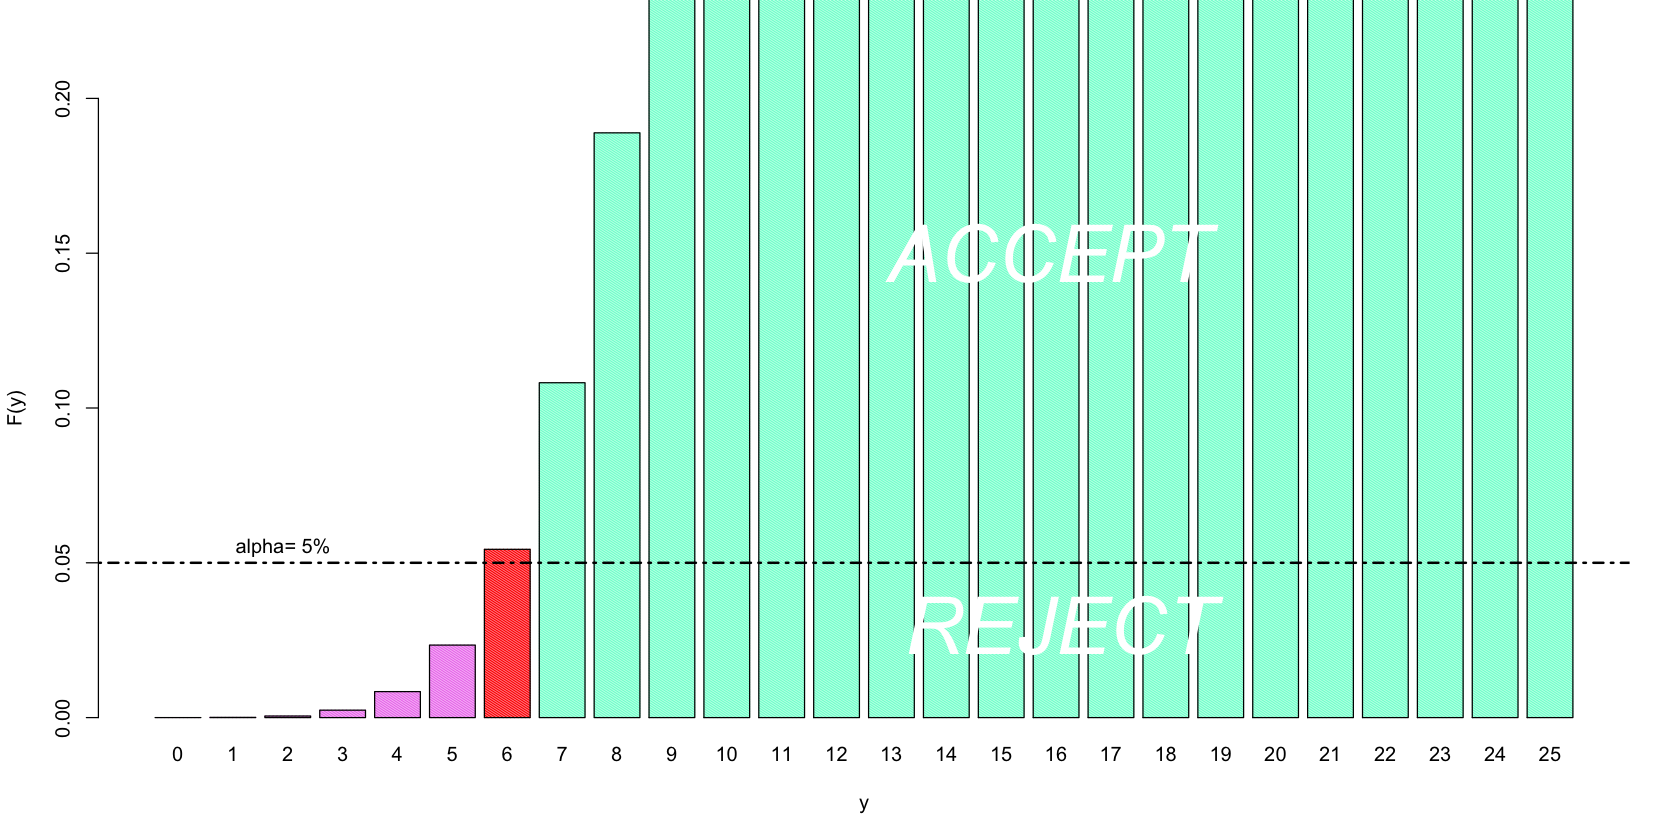

In [7]:
p=15/100
n=75
x<-0:25

y1<-pbinom(x, n, p)
x1<-0:6
z<-dbinom(x1,n,p)
pvalue<-sum(z)
cat("The p-value is:", round(pvalue,4))
cols <-c(rep("violet",times=6), "red", rep("aquamarine",times=24))
barplot(y1,names=x,
        ylim=c(0,0.20),
       xlab="y",
       ylab= "F(y)",
       col=cols,
       density=100
       )
abline(h=0.05,col=c("black"), lty=c(4), lwd=c(2))
text(x=20,y=0.15,labels=paste("ACCEPT "), cex=4,col ='white', font=3)
text(x=20,y=0.03,labels=paste("REJECT"), cex=4,col ='white', font=3)
text(x=3,y=0.055,labels=paste("alpha= 5%"), col ='black', font=1)

 We can see that y=6 lies in the accept region and the p-value is greater than $ \alpha = 5 \% $, so we cannot reject the NULL hypothesis $H_o$="the new test is not better than the old one" at level of significance $ \alpha = 5 \% $.

The p-value can be calculated also with the R-function "$ binom.test $" and the result it's the same computed above.

In [8]:
binom.test(6, 75, 0.15,"less")


	Exact binomial test

data:  6 and 75
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


# EXERCISE 2

## • Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.
## • Considering the following to sets of observations taken over a fixed large time interval in two different corps:


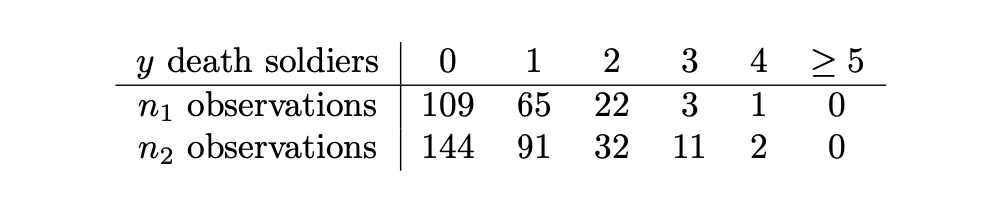

In [377]:
library("IRdisplay")
display_png(file="deaths.png") 

## 1) assuming a uniform prior, compute and plot the posterior distribution for $ \lambda $ , the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

UNIFORM PRIOR DATA SET 1 
The posterior mean is: 0.615 
The posterior variance is: 0.0031 
The posterior median is: 0.613 
The posterior 95% credibility interval assuming an Uniform prior is: [ 0.5111 ,  0.7283 ] 
  
  
UNIFORM PRIOR DATA SET 2 
The posterior mean is: 0.704 
The posterior variance is: 0.0025 
The posterior median is: 0.702 
The posterior 95% credibility interval assuming an Uniform prior is: [ 0.6087 ,  0.8052 ] 


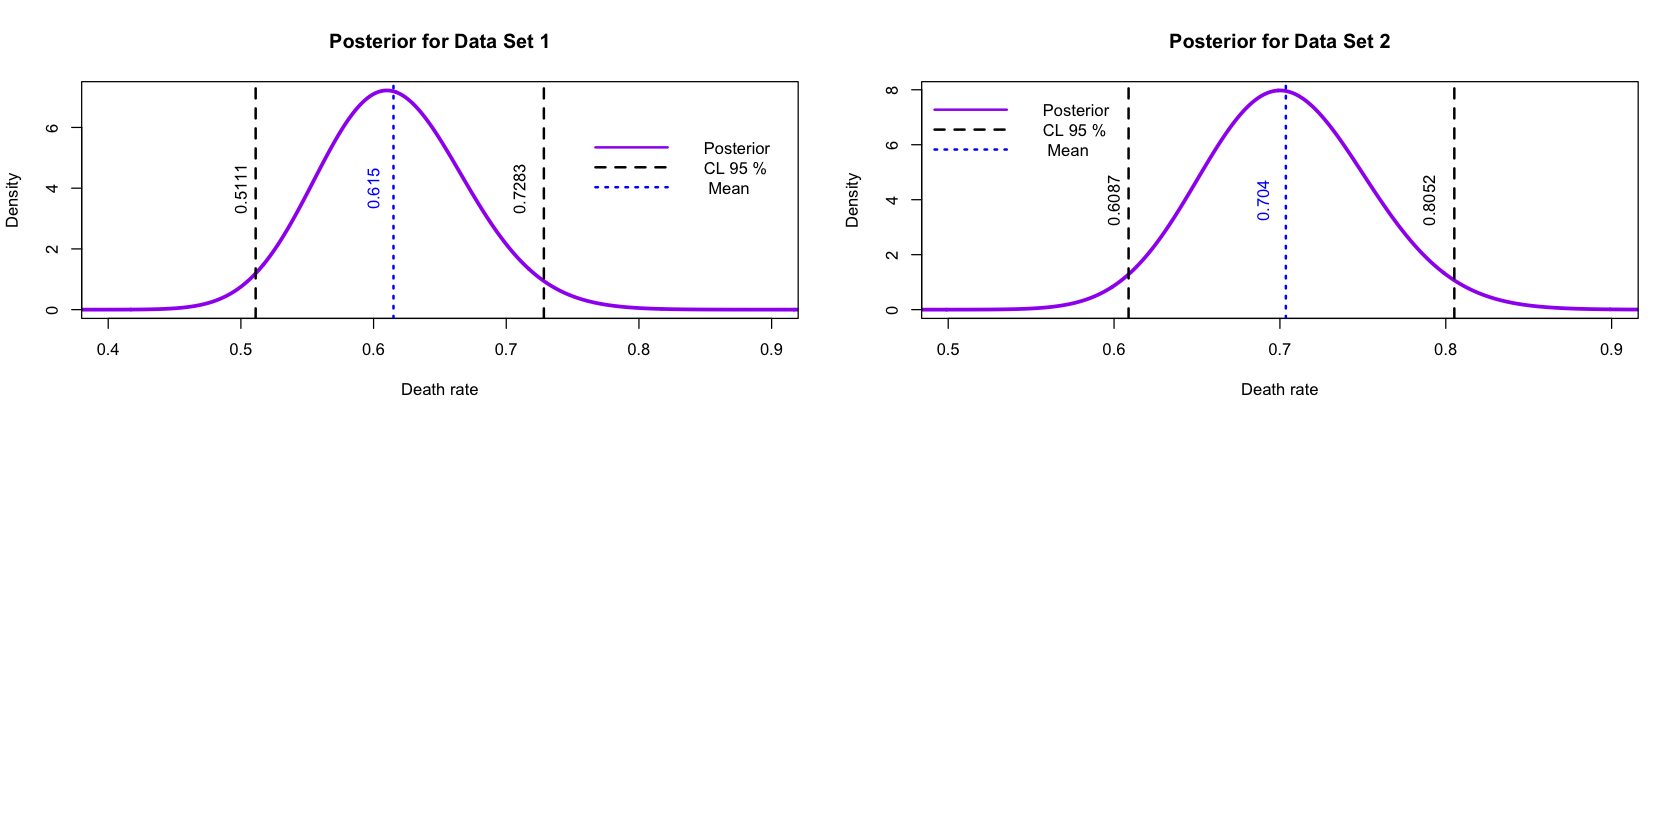

In [9]:

yd<-c(0,1,2,3,4)
n1<-c(109,65,22,3,1)
n2<-c(144,91,32,11,2)
yd1<-yd*n1
yd2<-yd*n2
p<-seq(0,2,0.001)





#uniform 1 
lambda1=sum(n1)
alpha1<- sum(yd1)+1
post.u<-dgamma(p,alpha1,lambda1)
unif1.mean<- alpha1/lambda1
unif1.var<- alpha1/(lambda1^2)
unif1.med<-qgamma(0.5,alpha1,lambda1)
unif1.025<-qgamma(0.025,alpha1,lambda1)
unif1.975<-qgamma(0.975,alpha1,lambda1)
stdu1<-sqrt(unif1.var)

#uniform 2
lambda2=sum(n2)
alpha2<- sum(yd2)+1
post.u2<-dgamma(p,alpha2,lambda2)
unif2.mean<- alpha2/lambda2
unif2.var<- alpha2/(lambda2^2)
unif2.med<-qgamma(0.5,alpha2,lambda2)
unif2.025<-qgamma(0.025,alpha2,lambda2)
unif2.975<-qgamma(0.975,alpha2,lambda2)
stdu2<-sqrt(unif2.var)

cat("UNIFORM PRIOR DATA SET 1","\n")
cat("=============================================================================================================","\n")

cat("The posterior mean is:",unif1.mean,"\n")
cat("The posterior variance is:",round(unif1.var,4),"\n")
cat("The posterior median is:",round(unif1.med,3),"\n")
cat("The posterior 95% credibility interval assuming an Uniform prior is:" , "[", round(unif1.025,4) , ", ",round(unif1.975,4),"]", "\n")


cat(" ","\n")
cat(" ","\n")

cat("UNIFORM PRIOR DATA SET 2","\n")
cat("=============================================================================================================","\n")
cat("The posterior mean is:",round(unif2.mean,3),"\n")
cat("The posterior variance is:",round(unif2.var,4),"\n")
cat("The posterior median is:",round(unif2.med,3),"\n")
cat("The posterior 95% credibility interval assuming an Uniform prior is:" , "[", round(unif2.025,4) , ", ",round(unif2.975,4),"]", "\n")


par(mfrow=c(2,2))
plot(p,post.u,
     col="purple",
     type="l",
     lwd=3,
     xlab="Death rate",
     ylab="Density",
     main="Posterior for Data Set 1",
     xlim=c(0.4,0.9))
abline(v=c(unif1.025,unif1.975),col=c("black", "black"), lty=c(2,2), lwd=c(2, 2))
abline(v=c(unif1.mean),col=c("blue"), lty=c(3), lwd=c(2))
text(x=0.5,y=4,labels=paste(round(unif1.025,4)), srt=90, cex=1,col ='black', font=1)
text(x=0.71,y=4,labels=paste(round(unif1.975,4)), srt=90, cex=1,col ='black', font=1)
text(x=0.6,y=4,labels=paste(round(unif1.mean,3)), srt=90, cex=1,col ='blue', font=1)

legend(x = 0.74,
       y=6,
       col = c("purple","black","blue"),
       lty = c(1,2,3),
       lwd = c(2,2,2),
       cex=1,
       bty="n",
       legend = c('Posterior ', 'CL 95 % '," Mean"))

plot(p,post.u2,
     col="purple",
     type="l",
     lwd=3,
     xlab="Death rate",
     ylab="Density",
     main="Posterior for Data Set 2",
     xlim=c(0.5,0.9))
abline(v=c(unif2.025,unif2.975),col=c("black", "black"), lty=c(2,2), lwd=c(2, 2))
abline(v=c(unif2.mean),col=c("blue"), lty=c(3), lwd=c(2))
text(x=0.6,y=4,labels=paste(round(unif2.025,4)), srt=90, cex=1,col ='black', font=1)
text(x=0.79,y=4,labels=paste(round(unif2.975,4)), srt=90, cex=1,col ='black', font=1)
text(x=0.69,y=4,labels=paste(round(unif2.mean,3)), srt=90, cex=1,col ='blue', font=1)

legend(x = 0.47,
       y=8,
       col = c("purple","black","blue"),
       lty = c(1,2,3),
       lwd = c(2,2,2),
       cex=1,
       bty="n",
       legend = c('Posterior ', 'CL 95 % '," Mean"))



## 2)  assuming now a Jeffreys’ prior, $ \sqrt(g(\lambda) \propto \frac{1}{ \lambda} $ with $\lambda>0$, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

JEFFREY'S PRIOR DATA SET 1 
The posterior mean is: 0.612 
The posterior variance is: 0.0031 
The posterior median is: 0.611 
The posterior 95% credibility interval assuming an Uniform prior is: [ 0.5088 ,  0.7256 ] 
  
  
JEFFREY'S PRIOR DATA SET 2 
The posterior mean is: 0.702 
The posterior variance is: 0.0025 
The posterior median is: 0.701 
The posterior 95% credibility interval assuming an Uniform prior is: [ 0.6071 ,  0.8032 ] 


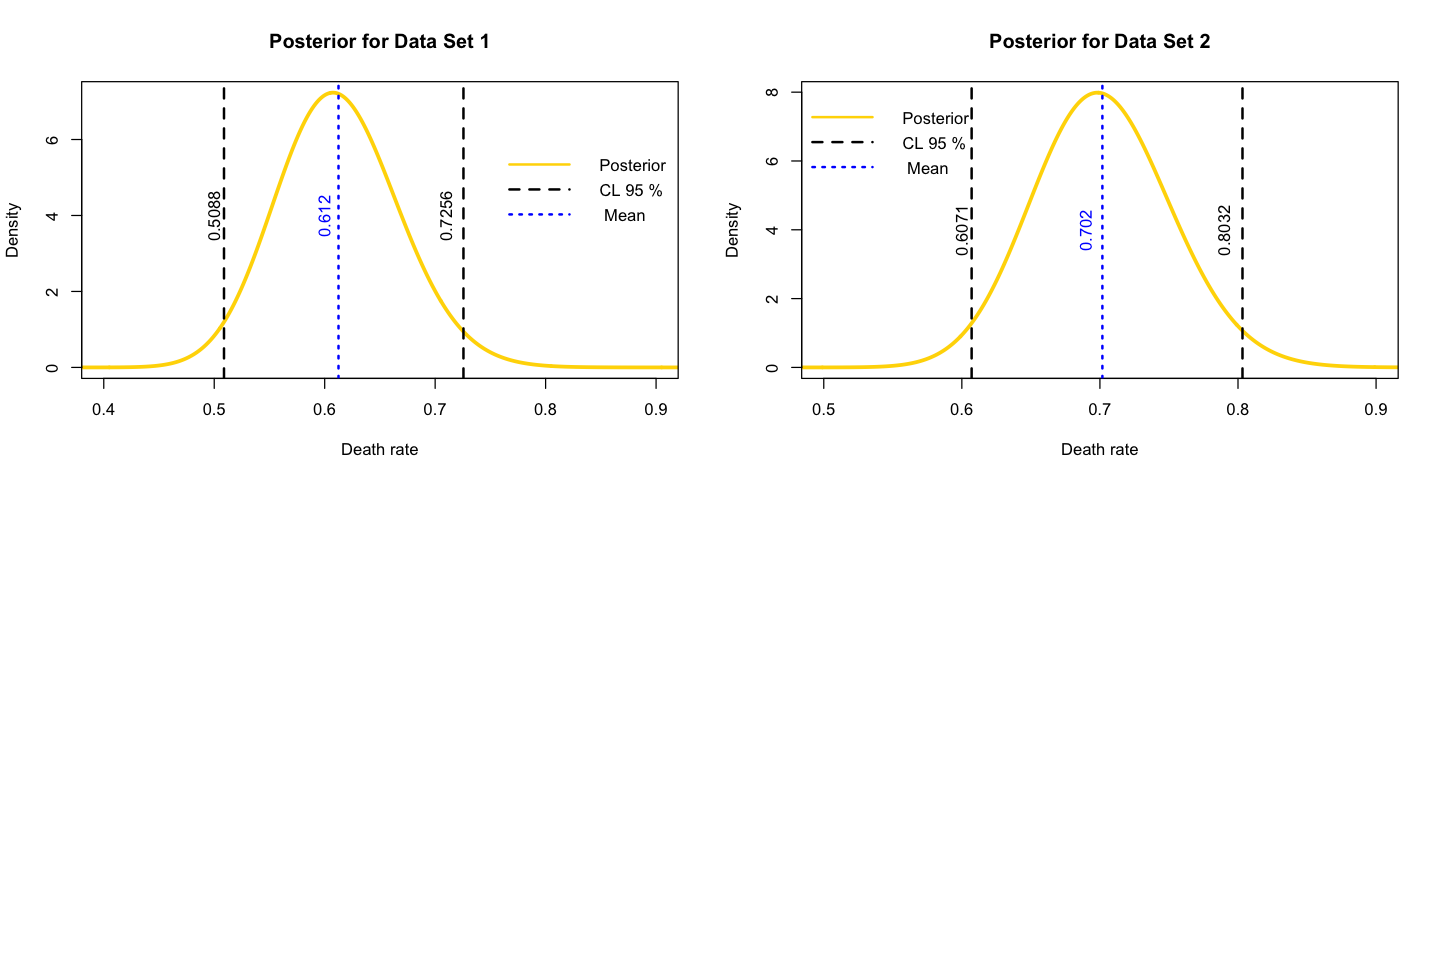

In [10]:

#jeffrey1
alphaj1=sum(yd1)+0.5
postjef<-dgamma(p,alphaj1,lambda1)
j1.mean<- alphaj1/lambda1
j1.var<- alphaj1/(lambda1^2)
j1.med<-qgamma(0.5,alphaj1,lambda1)
j1.025<-qgamma(0.025,alphaj1,lambda1)
j1.975<-qgamma(0.975,alphaj1,lambda1)
stdj1<-sqrt(j1.var)

#jeffrey2
alphaj2=sum(yd2)+0.5
postjef2<-dgamma(p,alphaj2,lambda2)
j2.mean<- alphaj2/lambda2
j2.var<- alphaj2/(lambda2^2)
j2.med<-qgamma(0.5,alphaj2,lambda2)
j2.025<-qgamma(0.025,alphaj2,lambda2)
j2.975<-qgamma(0.975,alphaj2,lambda2)
stdj2<-sqrt(j2.var)

cat("JEFFREY'S PRIOR DATA SET 1","\n")
cat("=============================================================================================================","\n")

cat("The posterior mean is:",round(j1.mean,3),"\n")
cat("The posterior variance is:",round(j1.var,4),"\n")
cat("The posterior median is:",round(j1.med,3),"\n")
cat("The posterior 95% credibility interval assuming an Uniform prior is:" , "[", round(j1.025,4) , ", ",round(j1.975,4),"]", "\n")


cat(" ","\n")
cat(" ","\n")

cat("JEFFREY'S PRIOR DATA SET 2","\n")
cat("=============================================================================================================","\n")
cat("The posterior mean is:",round(j2.mean,3),"\n")
cat("The posterior variance is:",round(j2.var,4),"\n")
cat("The posterior median is:",round(j2.med,3),"\n")
cat("The posterior 95% credibility interval assuming an Uniform prior is:" , "[", round(j2.025,4) , ", ",round(j2.975,4),"]", "\n")

options(repr.plot.width=12, repr.plot.height=8)
par(mfrow=c(2,2))
plot(p,postjef,
     col="gold1",
     type="l",
     lwd=3,
     xlab="Death rate",
     ylab="Density",
     main="Posterior for Data Set 1",
     xlim=c(0.4,0.9))
abline(v=c(j1.025,j1.975),col=c("black", "black"), lty=c(2,2), lwd=c(2, 2))
abline(v=c(j1.mean),col=c("blue"), lty=c(3), lwd=c(2))
text(x=0.5,y=4,labels=paste(round(j1.025,4)), srt=90, cex=1,col ='black', font=1)
text(x=0.71,y=4,labels=paste(round(j1.975,4)), srt=90, cex=1,col ='black', font=1)
text(x=0.6,y=4,labels=paste(round(j1.mean,3)), srt=90, cex=1,col ='blue', font=1)

legend(x = 0.74,
       y=6,
       col = c("gold1","black","blue"),
       lty = c(1,2,3),
       lwd = c(2,2,2),
       cex=1,
       bty="n",
       legend = c('Posterior ', 'CL 95 % '," Mean"))

plot(p,postjef2,
     col="gold1",
     type="l",
     lwd=3,
     xlab="Death rate",
     ylab="Density",
     main="Posterior for Data Set 2",
     xlim=c(0.5,0.9))
abline(v=c(j2.025,j2.975),col=c("black", "black"), lty=c(2,2), lwd=c(2, 2))
abline(v=c(j2.mean),col=c("blue"), lty=c(3), lwd=c(2))
text(x=0.6,y=4,labels=paste(round(j2.025,4)), srt=90, cex=1,col ='black', font=1)
text(x=0.79,y=4,labels=paste(round(j2.975,4)), srt=90, cex=1,col ='black', font=1)
text(x=0.69,y=4,labels=paste(round(j2.mean,3)), srt=90, cex=1,col ='blue', font=1)


legend(x = 0.47,
       y=8,
       col = c("gold1","black","blue"),
       lty = c(1,2,3),
       lwd = c(2,2,2),
       cex=1,
       bty="n",
       legend = c('Posterior ', 'CL 95 % '," Mean"))




### Uniform vs Jeffrey's priors


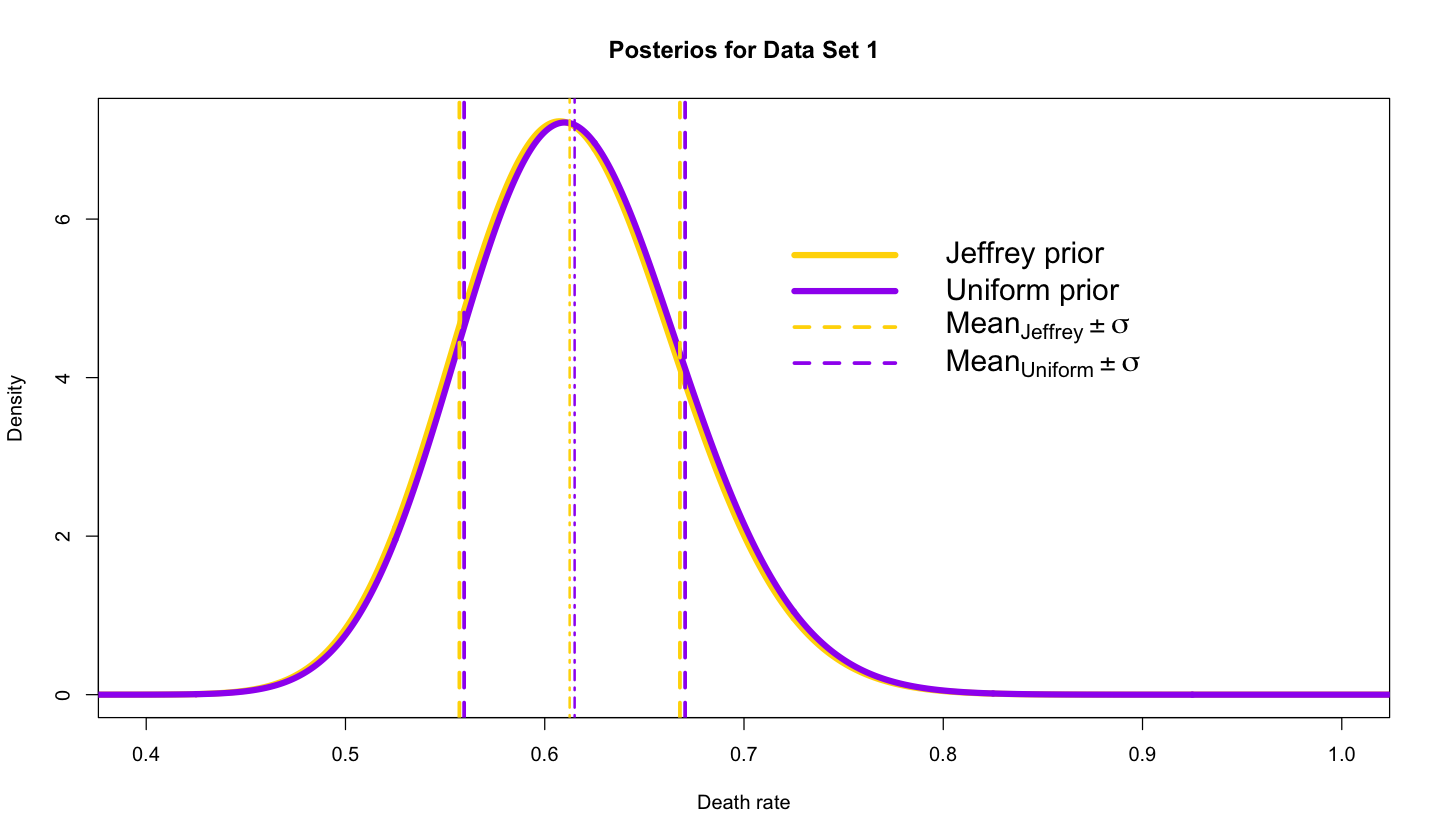

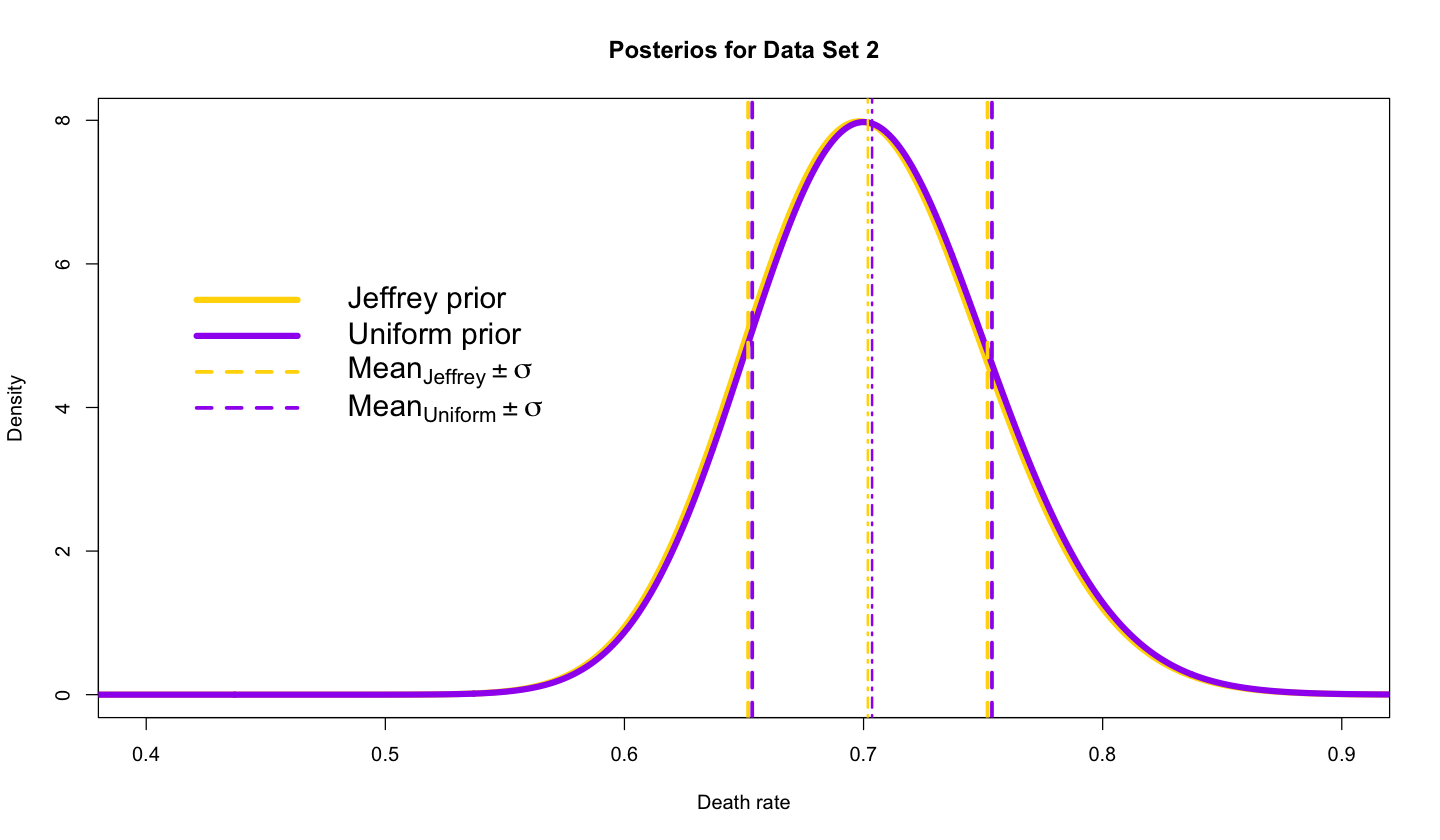

In [11]:
options(repr.plot.width=12, repr.plot.height=7)
par(mfrow=c(1,1))
plot(p,postjef,
     col="gold1",
     type="l",
     lwd=5,
     xlab="Death rate",
     ylab="Density",
     main="Posterios for Data Set 1",
     xlim=c(0.4,1))
lines(p,post.u,
      col="purple",
      lwd=5)
abline(v=c(unif1.mean-stdu1,unif1.mean+stdu1),col=c("purple", "purple"), lty=c(2,2), lwd=c(3, 3))
abline(v=c(j1.mean-stdj1,j1.mean+stdj1),col=c("gold1", "gold1"), lty=c(2,2), lwd=c(3, 3))
abline(v=c(j1.mean,unif1.mean),col=c("gold1", "purple"), lty=c(4,4), lwd=c(2, 2))
legend(x = 0.7,
       y=6,
       col = c("gold1","purple","gold1","purple"),
       lty = c(1,1,2,2),
       lwd = c(5,5,3,3),
       cex=1.5,
       bty="n",
       legend = c("Jeffrey prior", "Uniform prior " ,expression(Mean[Jeffrey] %+-% symbol(s)),expression(Mean[Uniform] %+-% symbol(s))))


options(repr.plot.width=12, repr.plot.height=7)
par(mfrow=c(1,1))
plot(p,postjef2,
     col="gold1",
     type="l",
     lwd=5,
     xlab="Death rate",
     ylab="Density",
     main="Posterios for Data Set 2",
     xlim=c(0.4,0.9))
lines(p,post.u2,
      col="purple",
      lwd=5)
abline(v=c(unif2.mean-stdu2,unif2.mean+stdu2),col=c("purple", "purple"), lty=c(2,2), lwd=c(3, 3))
abline(v=c(j2.mean-stdj2,j2.mean+stdj2),col=c("gold1", "gold1"), lty=c(2,2), lwd=c(3, 3))
abline(v=c(j2.mean,unif2.mean),col=c("gold1", "purple"), lty=c(4,4), lwd=c(2, 2))
legend(x = 0.4,
       y=6,
       col = c("gold1","purple","gold1","purple"),
       lty = c(1,1,2,2),
       lwd = c(5,5,3,3),
       cex=1.5,
       bty="n",
       legend = c("Jeffrey prior", "Uniform prior " ,expression(Mean[Jeffrey] %+-% symbol(s)),expression(Mean[Uniform] %+-% symbol(s))))




# EXERCISE 3- PART A

## • A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. $n$ = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, $y$ = 11 had a high bacter X level.
## • indicating with $p$ the probability that a sample of water taken from the stream has a high bacter X level,


## 1) find the frequentist estimator for $p$

In the Frequentist approach, an unbiased estimator for the Binomial distribution is:
$$
\hat{p_{F}} = \frac{y}{n}
$$
 where $y$ is the number of successes in $n$ trials.

 So in this case:
 $$
\hat{p_{F}} = \frac{y}{n}=\frac{11}{116}=0.095
$$

## 2) using a Beta(1,10) prior for $p$, calculate and posterior distribution $P(p|y)$

If we start with a Beta Prior with parameters $ a $ and $ b$, and then measure $ y$ number of success in $n$ trials, the Posterior is a Beta functions with parameters:

$$
a' =a + y = 12
$$

$$
b' =b + n-y  = 115
$$



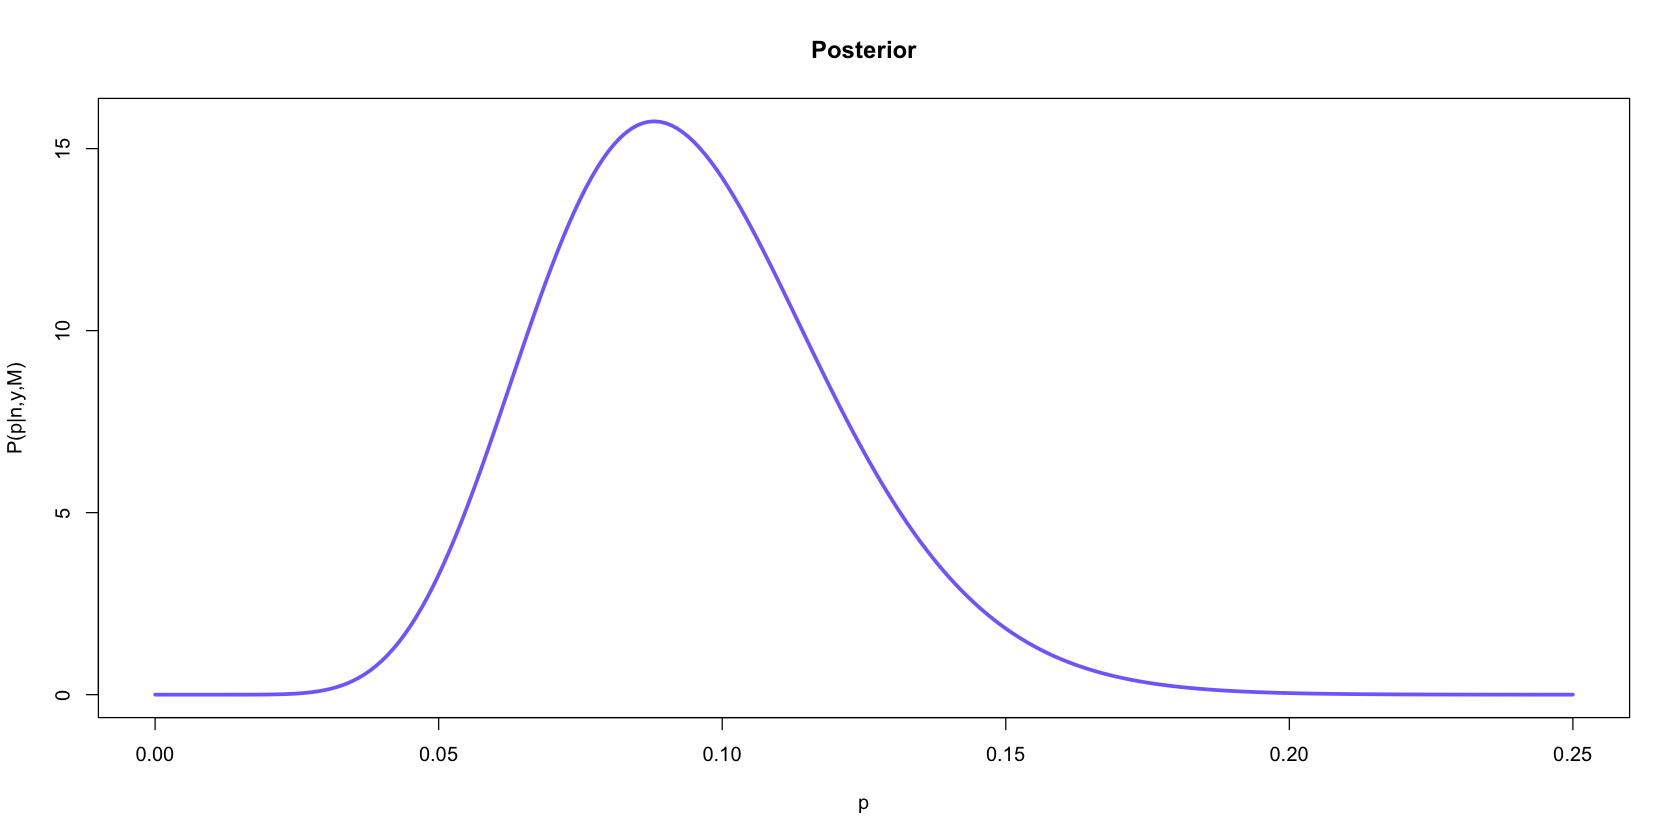

In [12]:
#posterior
aw<-1
bw<-10
y<-11
n<-116
aw1<-aw+y
bw1<-bw+116-y

p<-seq(0,0.25,0.001)
post.beta<-dbeta(p,aw1,bw1)
options(repr.plot.width=14, repr.plot.height=7)
plot(p, post.beta,
     col="lightslateblue",
     type="l",
     lty=1,
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior")

## 3) find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval

The posterior  mean (Bayesian approach) is: 0.094 
The posterior  mean (Frequentist approach) is: 0.095 
The posterior variance is: 7e-04 
The posterior median is: 0.092 
The posterior 95% credibility interval assuming an beta prior is: [ 0.0502 ,  0.1508 ] 


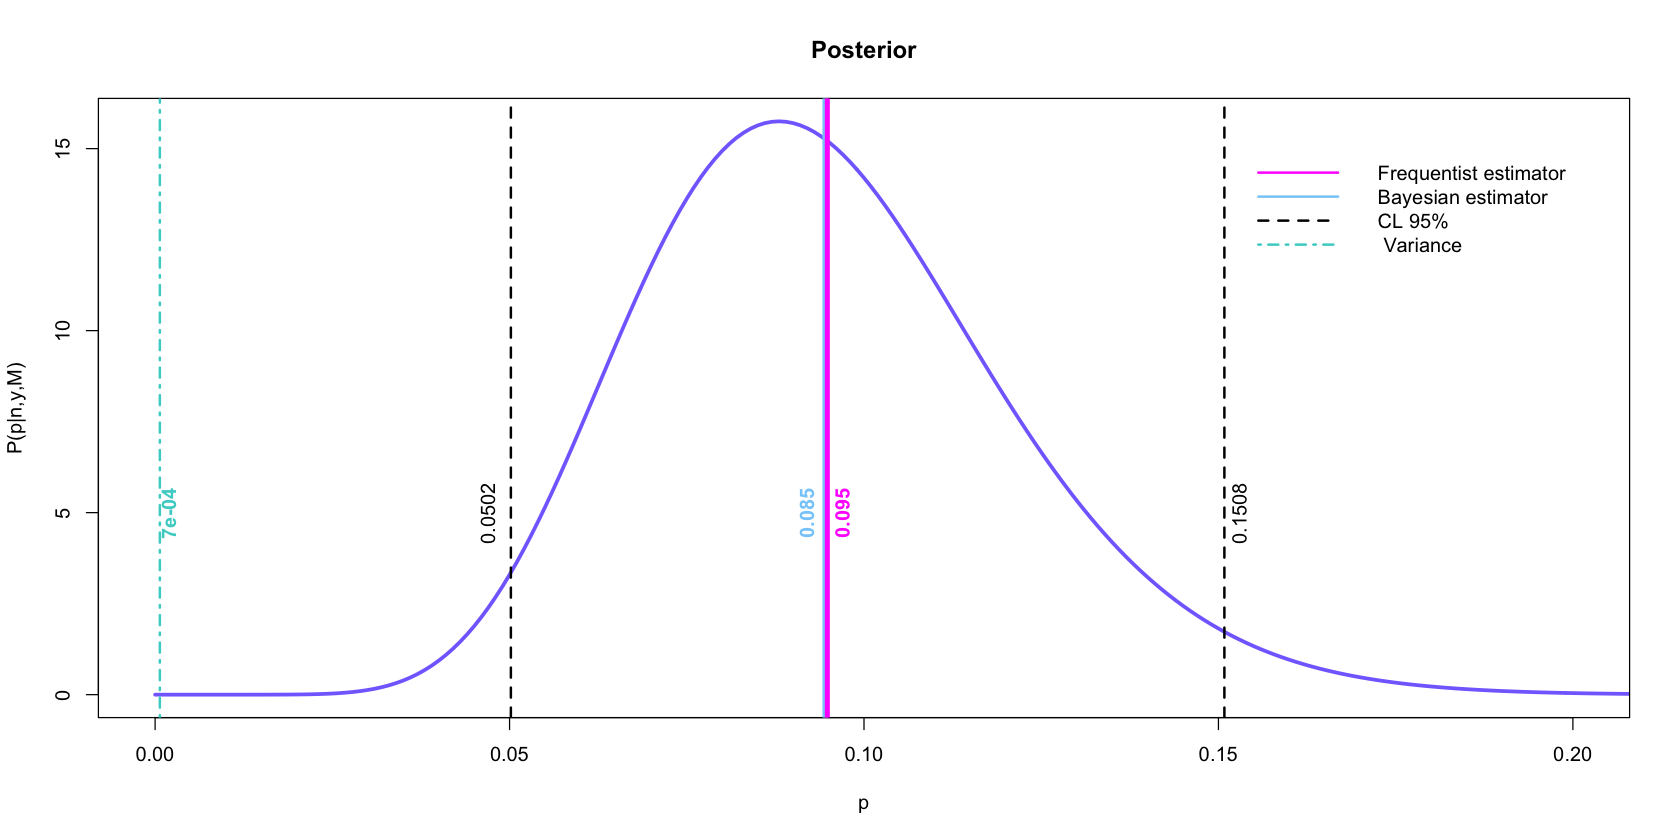

In [13]:
#mean, variance bayesian, CL
mw<-aw1/(aw1+bw1)
varw<- (aw1*bw1)/(((aw1+bw1)^2)*(aw1+bw1+1))
std<-sqrt(varw)
betaw.med<-qbeta(0.5,aw1,bw1)
betaw.025<-qbeta(0.025,aw1,bw1)
betaw.975<-qbeta(0.975,aw1,bw1)
mf<-11/116
cat("The posterior  mean (Bayesian approach) is:",round(mw,3),"\n")
cat("The posterior  mean (Frequentist approach) is:",round(mf,3),"\n")
cat("The posterior variance is:",round(varw,4),"\n")
cat("The posterior median is:",round(betaw.med,3),"\n")
cat("The posterior 95% credibility interval assuming an beta prior is:" , "[", round(betaw.025,4) , ", ",round(betaw.975,4),"]", "\n")

#plot
options(repr.plot.width=14, repr.plot.height=7)
plot(p, post.beta,
     col="lightslateblue",
     type="l",
     lty=1,
     xlim=c(0,0.2),
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior")
abline(v=c(mw,mf),col=c("lightskyblue", "magenta"), lty=c(1,1), lwd=c(4, 4))
abline(v=c(betaw.025,betaw.975),col=c("black", "black"), lty=c(2,2), lwd=c(2, 2))
abline(v=c(varw),col=c("mediumturquoise"), lty=c(4), lwd=c(2))
text(x=0.047,y=5,round(betaw.025,4),srt=90)
text(x=0.153,y=5,round(betaw.975,4),srt=90)
text(x=0.097,y=5,round(mf,3),srt=90, col ='magenta', font=2)
text(x=0.092,y=5,round(m,3),srt=90, col ='lightskyblue', font=2)
text(x=0.002,y=5,round(varw,4),srt=90, col ='mediumturquoise', font=2)
legend(x = 0.15,
       y= 15,
       col = c("magenta", "lightskyblue","black","mediumturquoise"),
       lty = c(1,1,2,4),
       lwd = c(2,2,2,2),
       cex=1,
       bty="n",
       legend = c('Frequentist estimator ', 'Bayesian estimator ', "CL 95%", " Variance"))

## 4) test the hypotesis
## $$
H_o :p=0.1 \ versus \  H_1 :p \not = 0.1
$$
## at 5% level of significance with both the frequentist and bayesian approach


### Bayesian

If $p$ lies  inside the credibility interval, we do not reject the null hypothesis. In this case it does so we can't reject the null hypothesis.

In [14]:
cat("The posterior 95% credibility interval assuming an beta prior is:" , "[", round(betaw.025,4) , ", ",round(betaw.975,4),"]", " and p lies in the interval.","\n")


The posterior 95% credibility interval assuming an beta prior is: [ 0.0502 ,  0.1508 ]  and p lies in the interval. 


### Frequentist

- the null distribution is the sampling distribution of $y$: $ Bin(y| n = 116,p = 0.1)$
- in defining the rejection region, we take into account that $y$ has a discrete distribution, and choose the level of significance as close to 5% as possible
- we observe if $y$=11 lies in the acceptance region

In [15]:
y<-0:25
p<-0.1
n<-116
post.bin<-dbinom(y,n,p)

#95% cl and alpha
low.bin <-  qbinom(0.025, n, 0.1)
up.bin <- qbinom(0.975,n,0.1)
z<-low.bin:up.bin
pbin95<-dbinom(z,n,p)
pbin95<-sum(pbin95)
alpa<-1-pbin95
cat("The area that corresponds to 95% credibility interval is : ", round(pbin95,4), "\n")
cat("The area that corresponds to alpha=5%  is : ", round(alpa,4), "\n")
cat("The  bin where the credibility interval starts is : ", low.bin, "\n")
cat("The  bin where the credibility interval ends is : ", up.bin, "\n")

The area that corresponds to 95% credibility interval is :  0.9575 
The area that corresponds to alpha=5%  is :  0.0425 
The  bin where the credibility interval starts is :  6 
The  bin where the credibility interval ends is :  18 


As explain above in defining the rejection region, we take into account that $y$ has a discrete distribution, and choose the level of significance as close to 5% as possible, in this case:
$$
 \{ y \leq 6  \} \cup  \{ y \geq 18 \} \ with \ \alpha= 0.0425
 $$

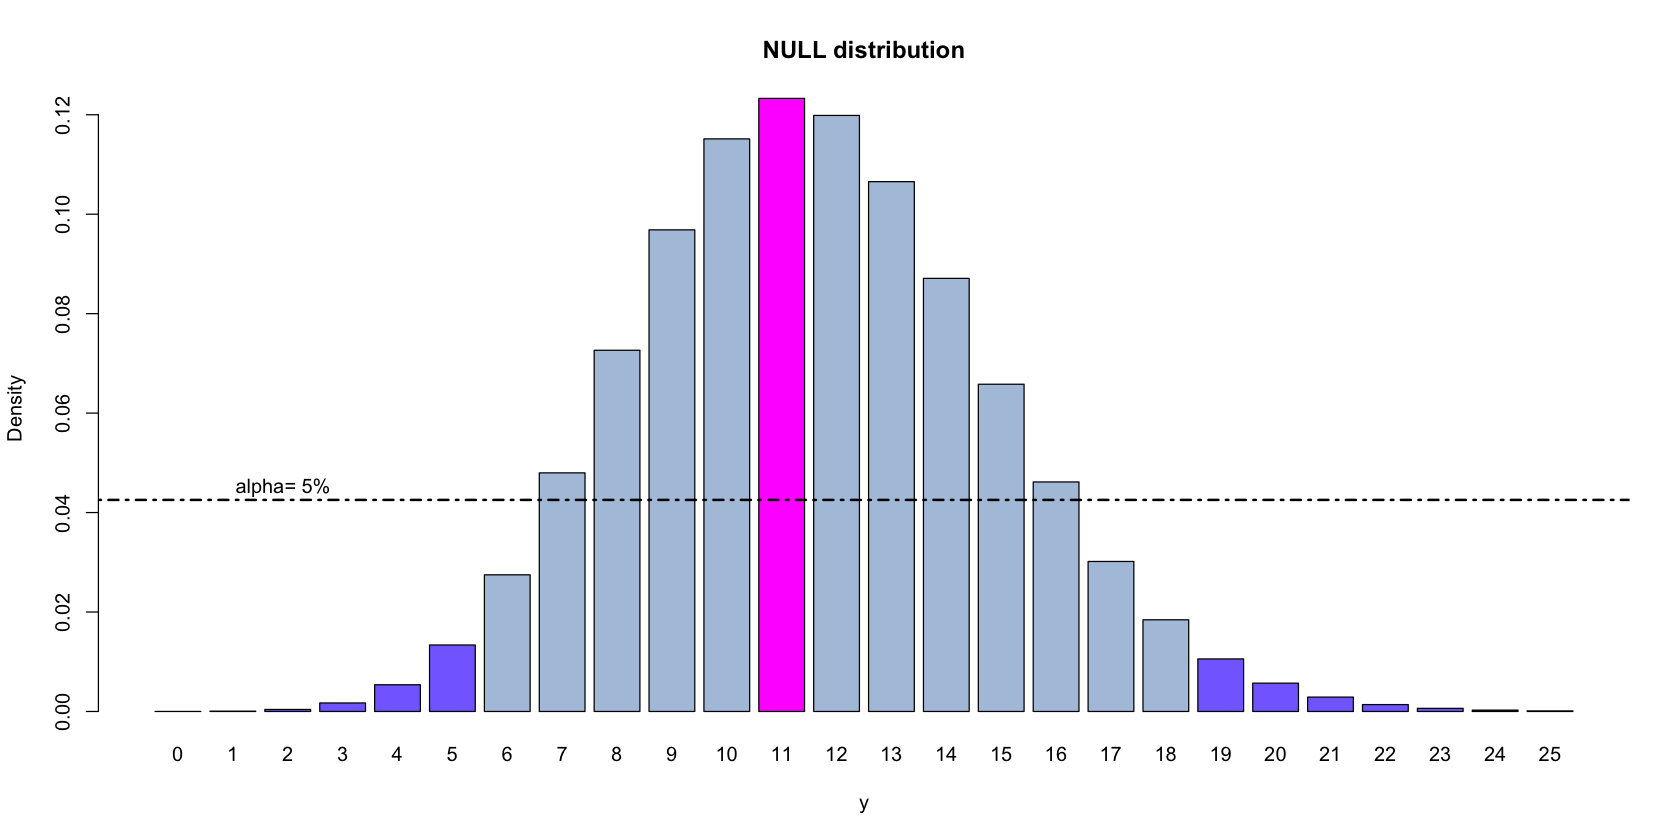

In [16]:
cols <-c(rep("lightslateblue",times=6), rep("lightsteelblue",times=5),"magenta", rep("lightsteelblue",times=7),rep("lightslateblue",times=4))
barplot(post.bin,names=y,
       col=cols,
       main="NULL distribution",
       ylab= "Density",
       xlab="y")
abline(h=alpa,col=c("black"), lty=c(4), lwd=c(2))
text(x=3,y=0.045,labels=paste("alpha= 5%"), col ='black', font=1)

We observe $y$ = 11, which lies inside the acceptance region, so we can accept the null hypothesis.

# EXERCISE 3- PART B

## A new measurement, performed one month later on $n$ = 165 water samples, gives $y$ = 9 high bacter X level

## 1) find the frequentist estimator for $p$

In the Frequentist approach, an unbiased estimator for the Binomial distribution is:
$$
\hat{p_{F}} = \frac{y}{n}
$$
where $y$ is the number of successes in $n$ trials.

 So in this case:
$$
\hat{p_{F}} = \frac{y}{n}=\frac{9}{165}=0.0545
$$

## 2) find a bayesian estimator for $p$, assuming both a Beta(1,10) prior for $p$, and assuming the posterior probability of the older measurement as the prior for the new one.


If we start with a Beta Prior with parameters $ a $ and $ b$, and then measure $ y$ number of success in $n$ trials, the Posterior is a Beta functions with parameters:

$$
a' =a + y 
$$

$$
b' =b + n-y  
$$



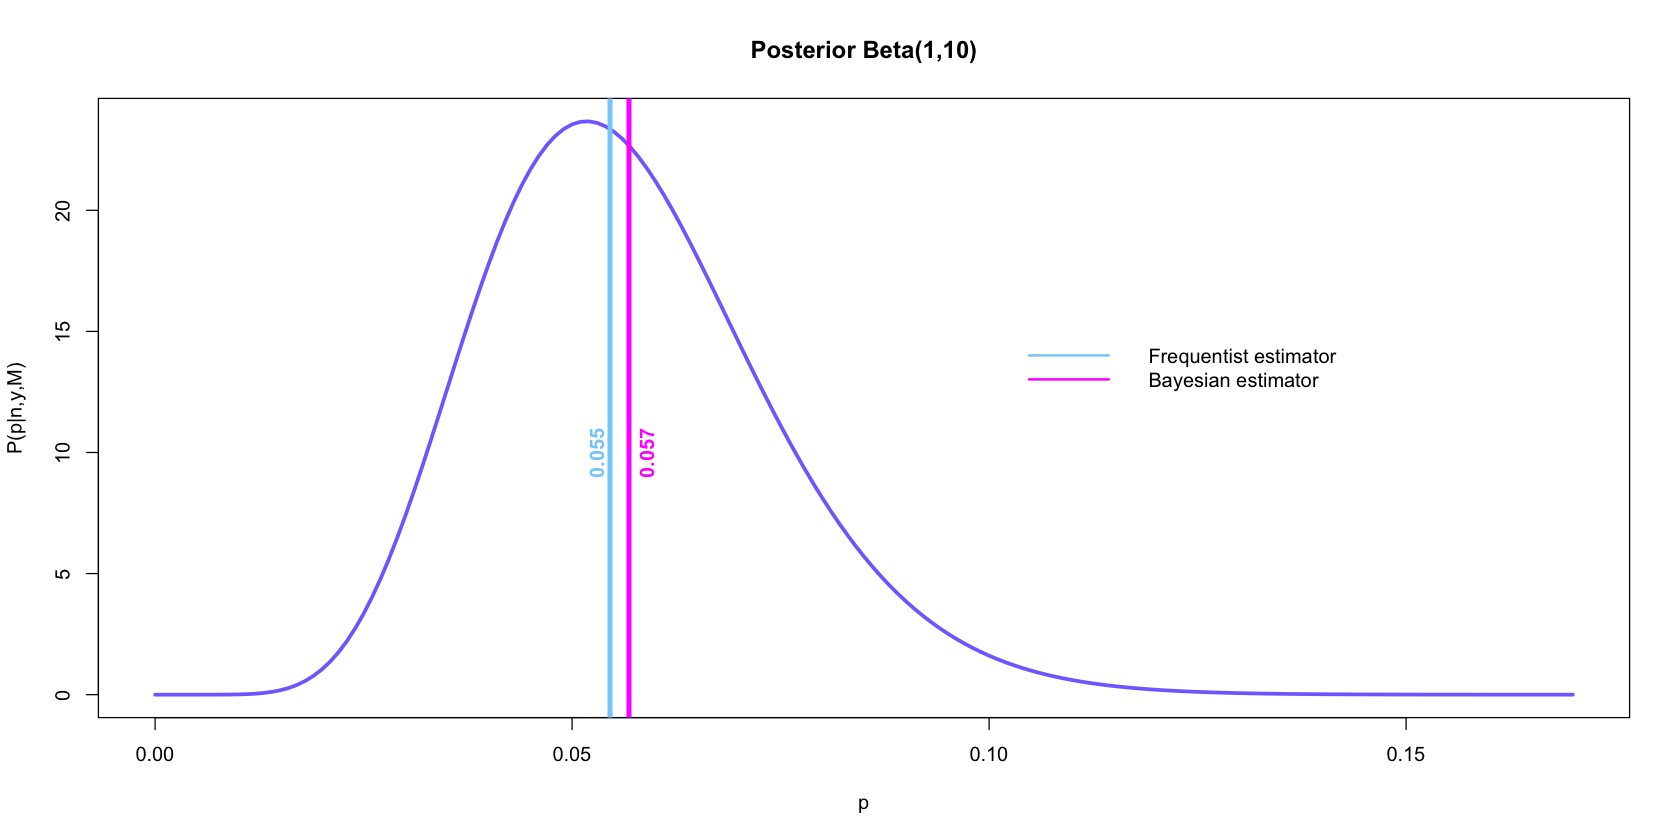

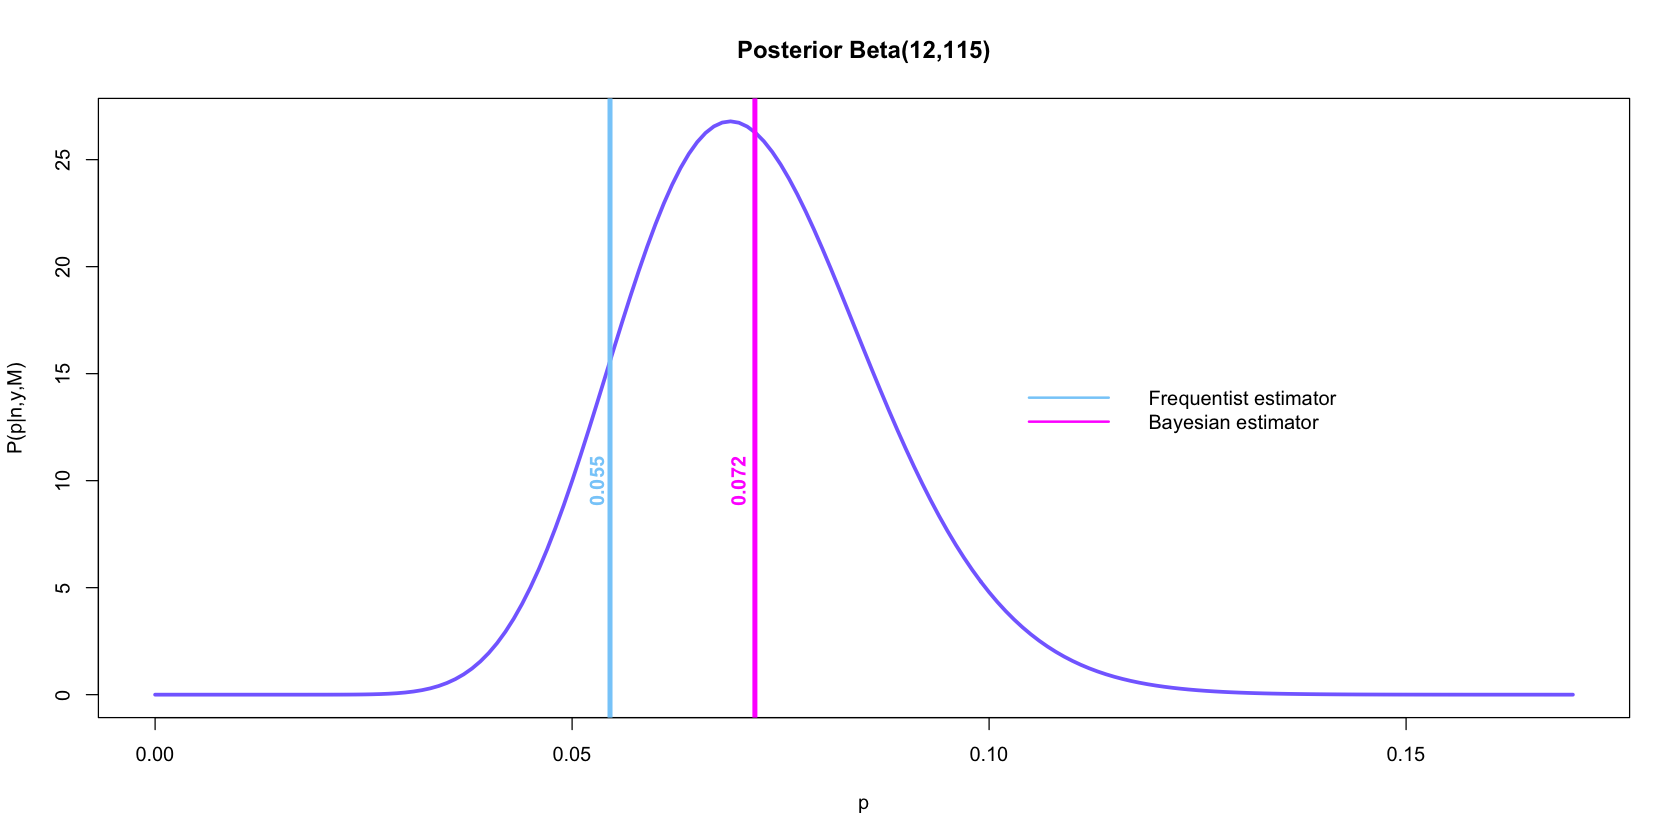

In [379]:
#posterior beta(1,10)
a10<-1
b10<-10
y<-9
n<-165
aw1<-a10+y
bw1<-b10 +165-y
p<-seq(0,0.17,0.001)
post.beta<-dbeta(p,aw1,bw1)
#mean
mw1<-aw1/(aw1+bw1)



#posterior beta(12,115)
aw2<-12
bw2<-115
aw3<-aw2+y
bw3<-bw2+165-y
#mean
mw2<-aw3/(aw3+bw3)
post.beta2<-dbeta(p,aw3,bw3)

options(repr.plot.width=14, repr.plot.height=7)
plot(p, post.beta,
     col="lightslateblue",
     type="l",
     lty=1,
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior Beta(1,10)")
abline(v=mw1,col= "magenta", lty=c(1), lwd=c(4))
abline(v=9/165,col= "lightskyblue", lty=c(1), lwd=c(4))
text(x=0.059,y=10,round(mw1,3),srt=90, col ='magenta', font=2)
text(x=0.053,y=10,round(9/165,3),srt=90, col ='lightskyblue', font=2)

legend(x = 0.10,
       y= 15,
       col = c("lightskyblue", "magenta"),
       lty = c(1,1),
       lwd = c(2,2),
       cex=1,
       bty="n",
       legend = c('Frequentist estimator ', 'Bayesian estimator '))
plot(p, post.beta2,
     col="lightslateblue",
     type="l",
     lty=1,
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior Beta(12,115)")
abline(v=mw2,col= "magenta", lty=c(1), lwd=c(4))
abline(v=9/165,col= "lightskyblue", lty=c(1), lwd=c(4))
text(x=0.07,y=10,round(mw2,3),srt=90, col ='magenta', font=2)
text(x=0.053,y=10,round(9/165,3),srt=90, col ='lightskyblue', font=2)
legend(x = 0.10,
       y= 15,
       col = c("lightskyblue", "magenta"),
       lty = c(1,1),
       lwd = c(2,2),
       cex=1,
       bty="n",
       legend = c('Frequentist estimator ', 'Bayesian estimator '))

The Bayesian estimator for $p$ is the mean between the posteriors estimators computed with the two differents priors.

In [18]:
meanp<- (mw2+mw1)/2
cat("The Bayesian estimator for p is:" , round(meanp,3))

The Bayesian estimator for p is: 0.064

## 3) find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval


BETA(1,10) PRIOR 
The posterior  mean (Bayesian approach) is: 0.057 
The posterior variance is: 3e-04 
The posterior median is: 0.055 
The posterior 95% credibility interval assuming an beta(1,10) prior is: [ 0.0277 ,  0.0954 ] 
  
  
BETA(12,115) PRIOR 
The posterior  mean (Bayesian approach) is: 0.072 
The posterior variance is: 2e-04 
The posterior median is: 0.071 
The posterior 95% credibility interval assuming an beta(1,10) prior is: [ 0.0452 ,  0.1042 ] 


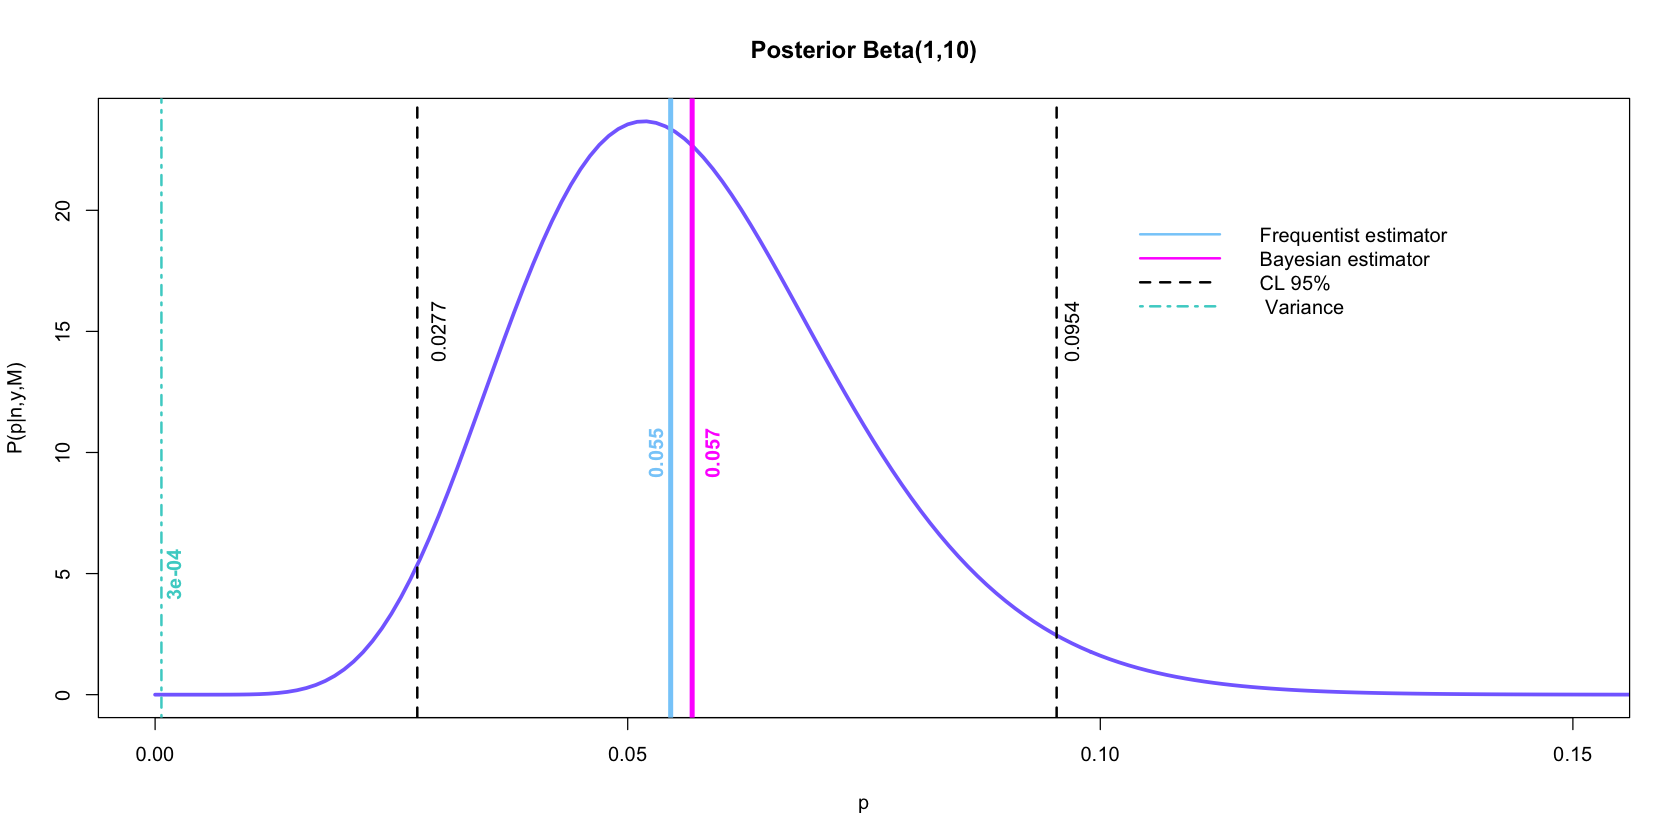

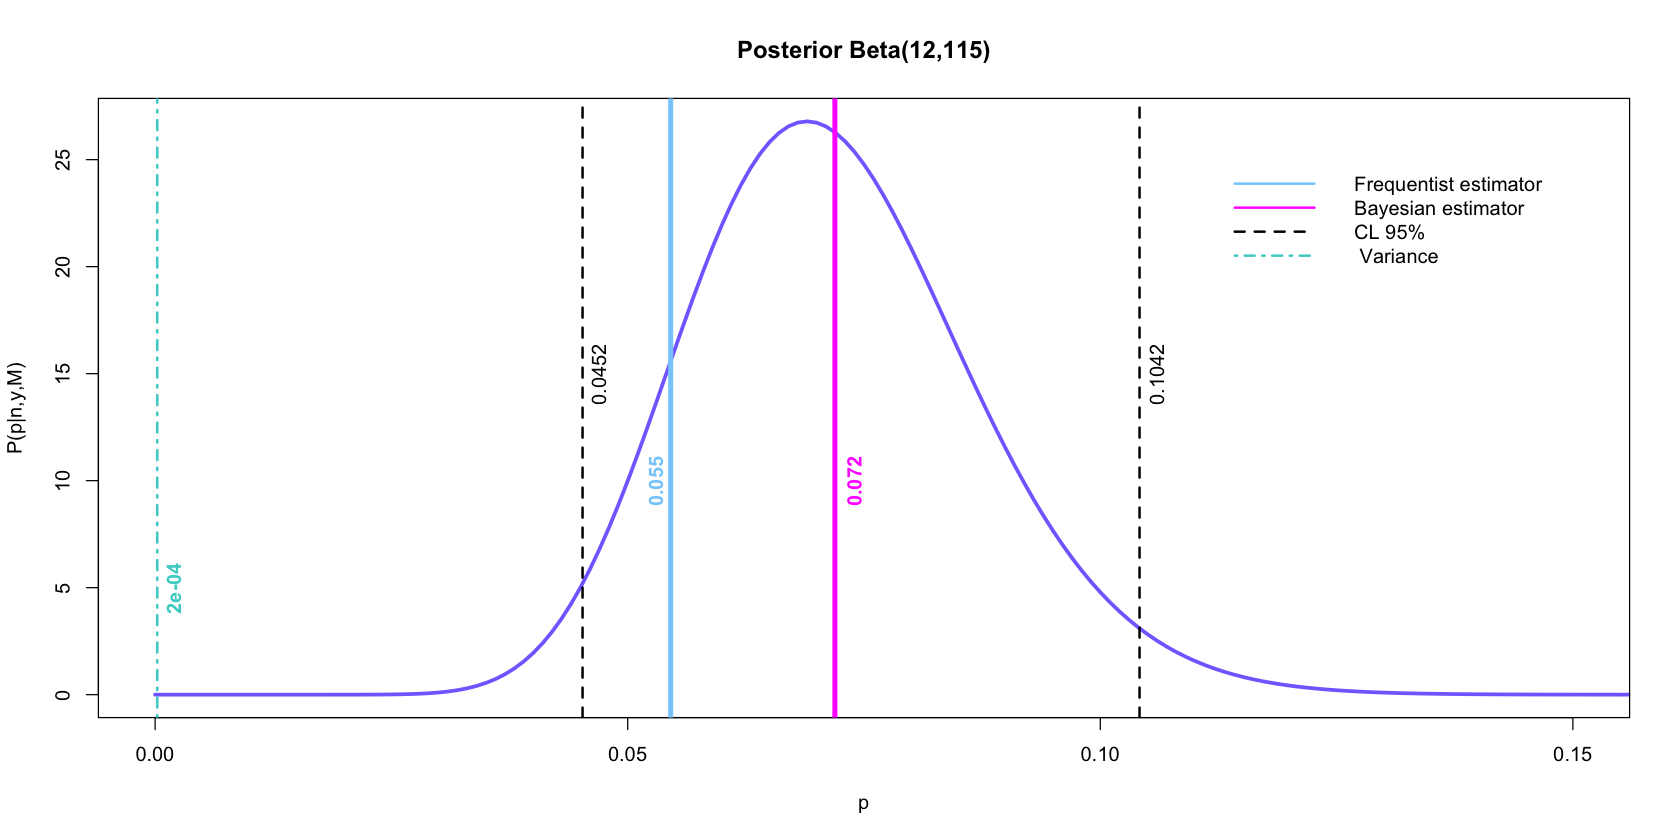

In [19]:
#mean, variance bayesian, CL
#beta(1,10)
varw1<- (aw1*bw1)/(((aw1+bw1)^2)*(aw1+bw1+1))
std<-sqrt(varw1)
betaw.med<-qbeta(0.5,aw1,bw1)
betaw.025<-qbeta(0.025,aw1,bw1)
betaw.975<-qbeta(0.975,aw1,bw1)
mf<-9/165

varw2<- (aw3*bw3)/(((aw3+bw3)^2)*(aw3+bw3+1))
std<-sqrt(varw2)
betaw2.med<-qbeta(0.5,aw3,bw3)
betaw2.025<-qbeta(0.025,aw3,bw3)
betaw2.975<-qbeta(0.975,aw3,bw3)
#beta(15,112)



cat("BETA(1,10) PRIOR","\n")
cat("=============================================================================================================","\n")


cat("The posterior  mean (Bayesian approach) is:",round(mw1,3),"\n")
cat("The posterior variance is:",round(varw1,4),"\n")
cat("The posterior median is:",round(betaw.med,3),"\n")
cat("The posterior 95% credibility interval assuming an beta(1,10) prior is:" , "[", round(betaw.025,4) , ", ",round(betaw.975,4),"]", "\n")


cat(" ","\n")
cat(" ","\n")

cat("BETA(12,115) PRIOR","\n")
cat("=============================================================================================================","\n")


cat("The posterior  mean (Bayesian approach) is:",round(mw2,3),"\n")
cat("The posterior variance is:",round(varw2,4),"\n")
cat("The posterior median is:",round(betaw2.med,3),"\n")
cat("The posterior 95% credibility interval assuming an beta(1,10) prior is:" , "[", round(betaw2.025,4) , ", ",round(betaw2.975,4),"]", "\n")


#plot
options(repr.plot.width=14, repr.plot.height=7)
plot(p, post.beta,
     col="lightslateblue",
     type="l",
     lty=1,
     xlim=c(0,0.15),
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior Beta(1,10)")
abline(v=mw1,col= "magenta", lty=c(1), lwd=c(4))
abline(v=9/165,col= "lightskyblue", lty=c(1), lwd=c(4))
abline(v=c(betaw.025,betaw.975),col=c("black", "black"), lty=c(2,2), lwd=c(2, 2))
abline(v=c(varw),col=c("mediumturquoise"), lty=c(4), lwd=c(2))
text(x=0.03,y=15,round(betaw.025,4),srt=90)
text(x=0.097,y=15,round(betaw.975,4),srt=90)
text(x=0.059,y=10,round(mw1,3),srt=90, col ='magenta', font=2)
text(x=0.053,y=10,round(9/165,3),srt=90, col ='lightskyblue', font=2)
text(x=0.002,y=5,round(varw1,4),srt=90, col ='mediumturquoise', font=2)
legend(x = 0.1,
       y= 20,
       col = c("lightskyblue", "magenta","black","mediumturquoise"),
       lty = c(1,1,2,4),
       lwd = c(2,2,2,2),
       cex=1,
       bty="n",
       legend = c('Frequentist estimator ', 'Bayesian estimator ', "CL 95%", " Variance"))


#plot
options(repr.plot.width=14, repr.plot.height=7)
plot(p, post.beta2,
     col="lightslateblue",
     type="l",
     lty=1,
     xlim=c(0,0.15),
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior Beta(12,115)")
abline(v=mw2,col= "magenta", lty=c(1), lwd=c(4))
abline(v=9/165,col= "lightskyblue", lty=c(1), lwd=c(4))
abline(v=c(betaw2.025,betaw2.975),col=c("black", "black"), lty=c(2,2), lwd=c(2, 2))
abline(v=c(varw2),col=c("mediumturquoise"), lty=c(4), lwd=c(2))
text(x=0.047,y=15,round(betaw2.025,4),srt=90)
text(x=0.106,y=15,round(betaw2.975,4),srt=90)
text(x=0.074,y=10,round(mw2,3),srt=90, col ='magenta', font=2)
text(x=0.053,y=10,round(9/165,3),srt=90, col ='lightskyblue', font=2)
text(x=0.002,y=5,round(varw2,4),srt=90, col ='mediumturquoise', font=2)
legend(x = 0.11,
       y= 25,
       col = c("lightskyblue", "magenta","black","mediumturquoise"),
       lty = c(1,1,2,4),
       lwd = c(2,2,2,2),
       cex=1,
       bty="n",
       legend = c('Frequentist estimator ', 'Bayesian estimator ', "CL 95%", " Variance"))



### Posterior Beta(1,10) vs Posterior Beta(12,115)

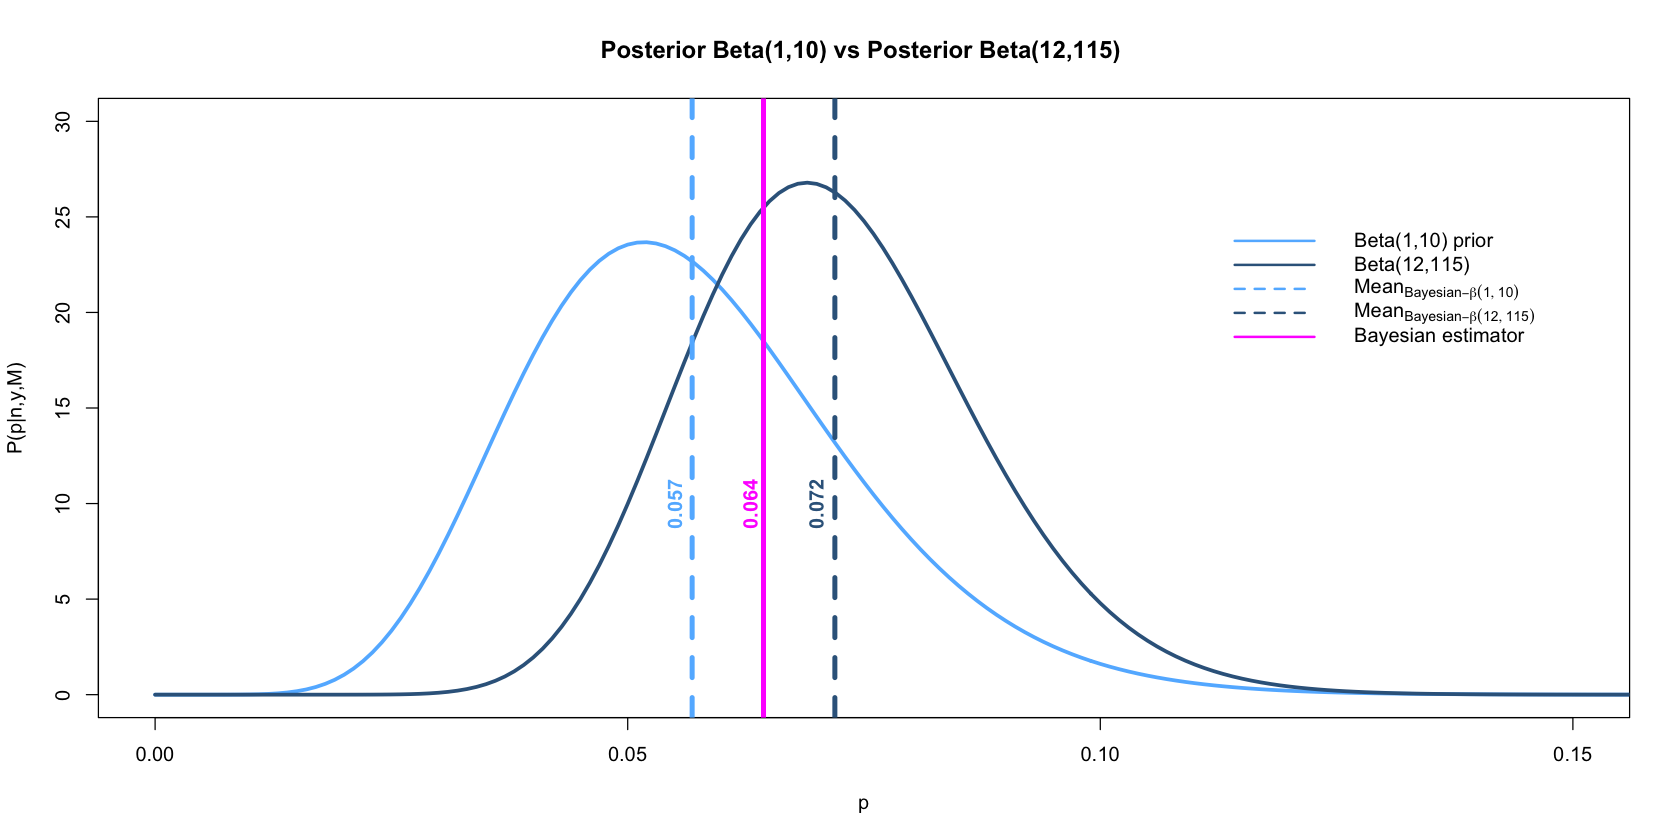

In [20]:
#plot
options(repr.plot.width=14, repr.plot.height=7)
plot(p, post.beta,
     col="steelblue1",
     type="l",
     lty=1,
     xlim=c(0,0.15),
     ylim=c(0,30),
     lwd = 3,
     xlab="p",
     ylab="P(p|n,y,M)",
     main="Posterior Beta(1,10) vs Posterior Beta(12,115) ")
lines(p, post.beta2,
     col="steelblue4",
     type="l",
     lty=1,
     lwd = 3)
abline(v=mw2,col= "steelblue4", lty=c(2), lwd=c(4))
abline(v=meanp,col= "magenta", lty=c(1), lwd=c(4))
text(x=0.070,y=10,round(mw2,3),srt=90, col ='steelblue4', font=2)
text(x=0.055,y=10,round(mw1,3),srt=90, col ='steelblue1', font=2)
text(x=0.063,y=10,round(meanp,3),srt=90, col ='magenta', font=2)
abline(v=mw1,col= "steelblue1", lty=c(2), lwd=c(4))
legend(x = 0.11,
       y= 25,
       col = c("steelblue1", "steelblue4","steelblue1", "steelblue4","magenta"),
       lty = c(1,1,2,2,1),
       lwd = c(2,2,2,2,2),
       cex=1,
       bty="n",
       legend = c('Beta(1,10) prior', 'Beta(12,115) ', expression(Mean[Bayesian-beta(1,10)]), expression(Mean[Bayesian-beta(12,115)]), "Bayesian estimator"))




## 4) test the hypotesis
## $$
H_o :p=0.1 \ versus \  H_1 :p \not = 0.1
$$
## at 5% level of significance with both the frequentist and bayesian approach



### Bayesian

If we consider $\beta (1,10)$  as the prior $ p =0.1$ is outside the credibility interval 95% so we can reject the null hypothesis.
Instead as regards $ \beta (12,115)$ ,  $ p =0.1 $ is inside the credibility interval 95% so we can't reject the null hypothesis.

### Frequentist

 - the null distribution is the sampling distribution of $y$: $ Bin(y| n = 165,p = 0.1)$
- in defining the rejection region, we take into account that $y$ has a discrete distribution, and choose the level of significance as close to 5% as possible
 - we observe if $y$=9 lies in the acceptance region

In [21]:
y<-0:32
p<-0.1
n<-165
post.bin<-dbinom(y,n,p)

#95% cl and alpha
low.bin <-  qbinom(0.025, n, 0.1)
up.bin <- qbinom(0.975,n,0.1)
z<-low.bin:up.bin
pbin95<-dbinom(z,n,p)
pbin95<-sum(pbin95)
alpa<-1-pbin95
cat("The area that corresponds to 95% credibility interval is : ", round(pbin95,4), "\n")
cat("The area that corresponds to alpha=5%  is : ", round(alpa,4), "\n")
cat("The  bin where the credibility interval starts is : ", low.bin, "\n")
cat("The  bin where the credibility interval ends is : ", up.bin, "\n")

The area that corresponds to 95% credibility interval is :  0.9634 
The area that corresponds to alpha=5%  is :  0.0366 
The  bin where the credibility interval starts is :  9 
The  bin where the credibility interval ends is :  24 


 ####  As explain above in defining the rejection region, we take into account that $y$ has a discrete distribution, and choose the level of significance as close to 5% as possible, in this case:
#### $$
 \{ y \leq 9  \} \cup  \{ y \geq 24 \} \ with \ \alpha = 0.0366
 $$

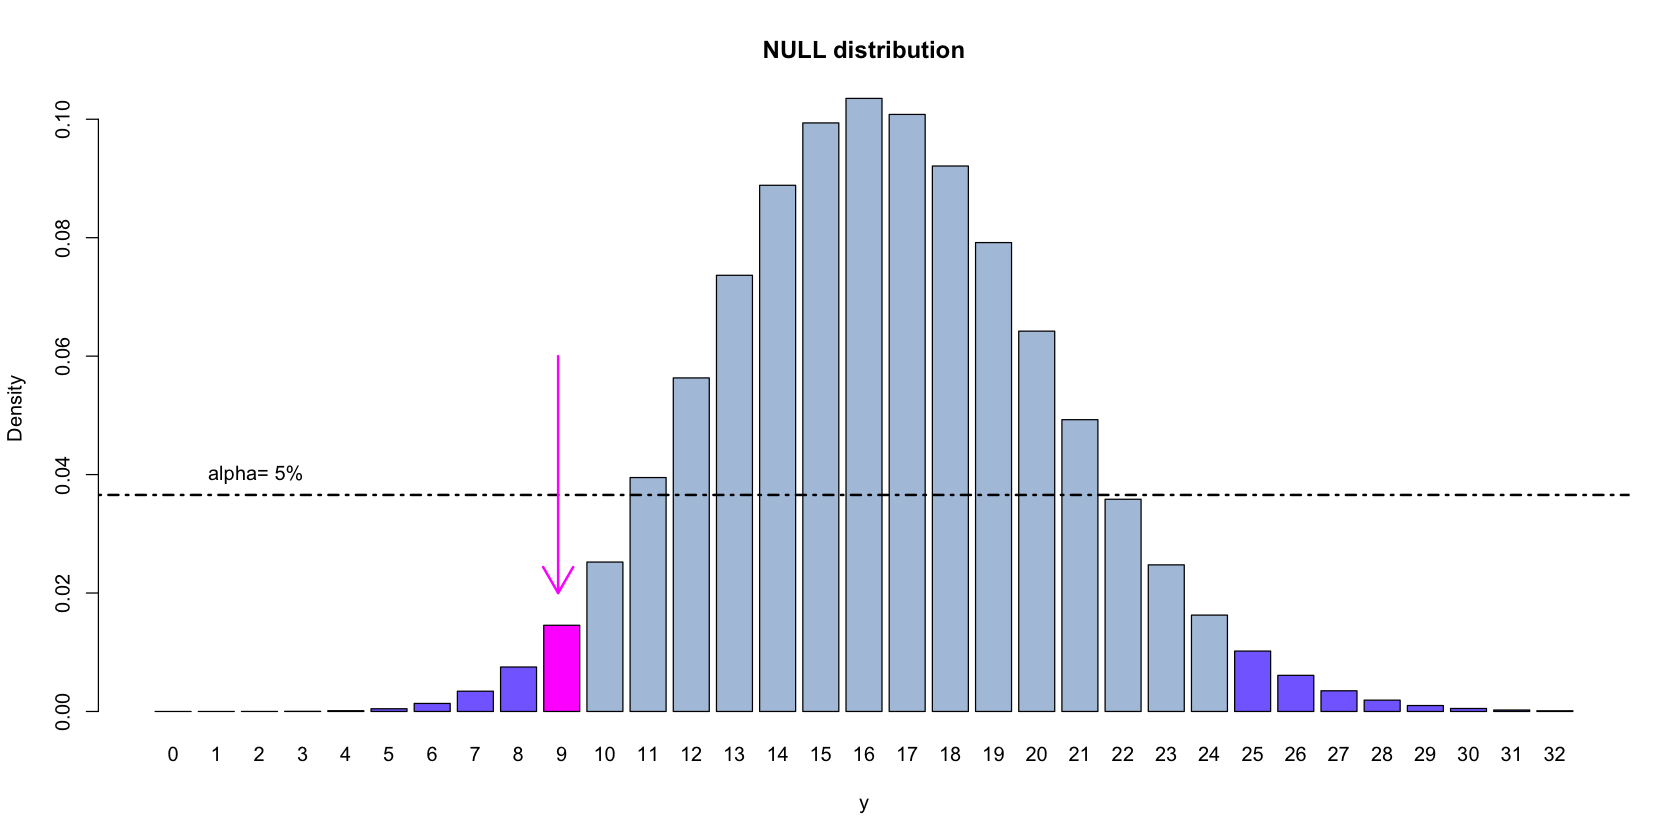

In [22]:
cols <-c(rep("lightslateblue",times=9),"magenta", rep("lightsteelblue",times=5), rep("lightsteelblue",times=10),rep("lightslateblue",times=3))
barplot(post.bin,names=y,
       col=cols,
       main="NULL distribution",
       ylab= "Density",
       xlab="y")
abline(h=alpa,col=c("black"), lty=c(4), lwd=c(2))
text(x=3,y=0.04,labels=paste("alpha= 5%"), col ='black', font=1)
arrows(11.4, 0.06, 11.4, 0.02, length = 0.25, code=2, lwd=2, col='magenta')

As shown in the graph, we observe $y$ = 9, which doesn't lie inside the acceptance region, so we reject the null hypothesis. By the way if we consider the p-value computed with $binom.test$ R-function we get:

In [23]:
binom.test(9, 165, 0.1)


	Exact binomial test

data:  9 and 165
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


The p-value is higher than $\alpha=5 \% $, so by this result we couldn't reject the null hypothesis. This show that  here we have a delicate case where to perform hypotesis test using the frequentist approach.

# EXERCISE 4

## • Analyze the data of Exercise 1 using a MCMC with JAGS (solve only point a of Ex 1)

### Point a

In [235]:
### usefull library
library(ggplot2)
library(rjags)
library(coda)
install.packages("bayesboot", repos='http://cran.us.r-project.org')
library("bayesboot")
install.packages("mcmcOutput", repos='http://cran.us.r-project.org')
library("mcmcOutput")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


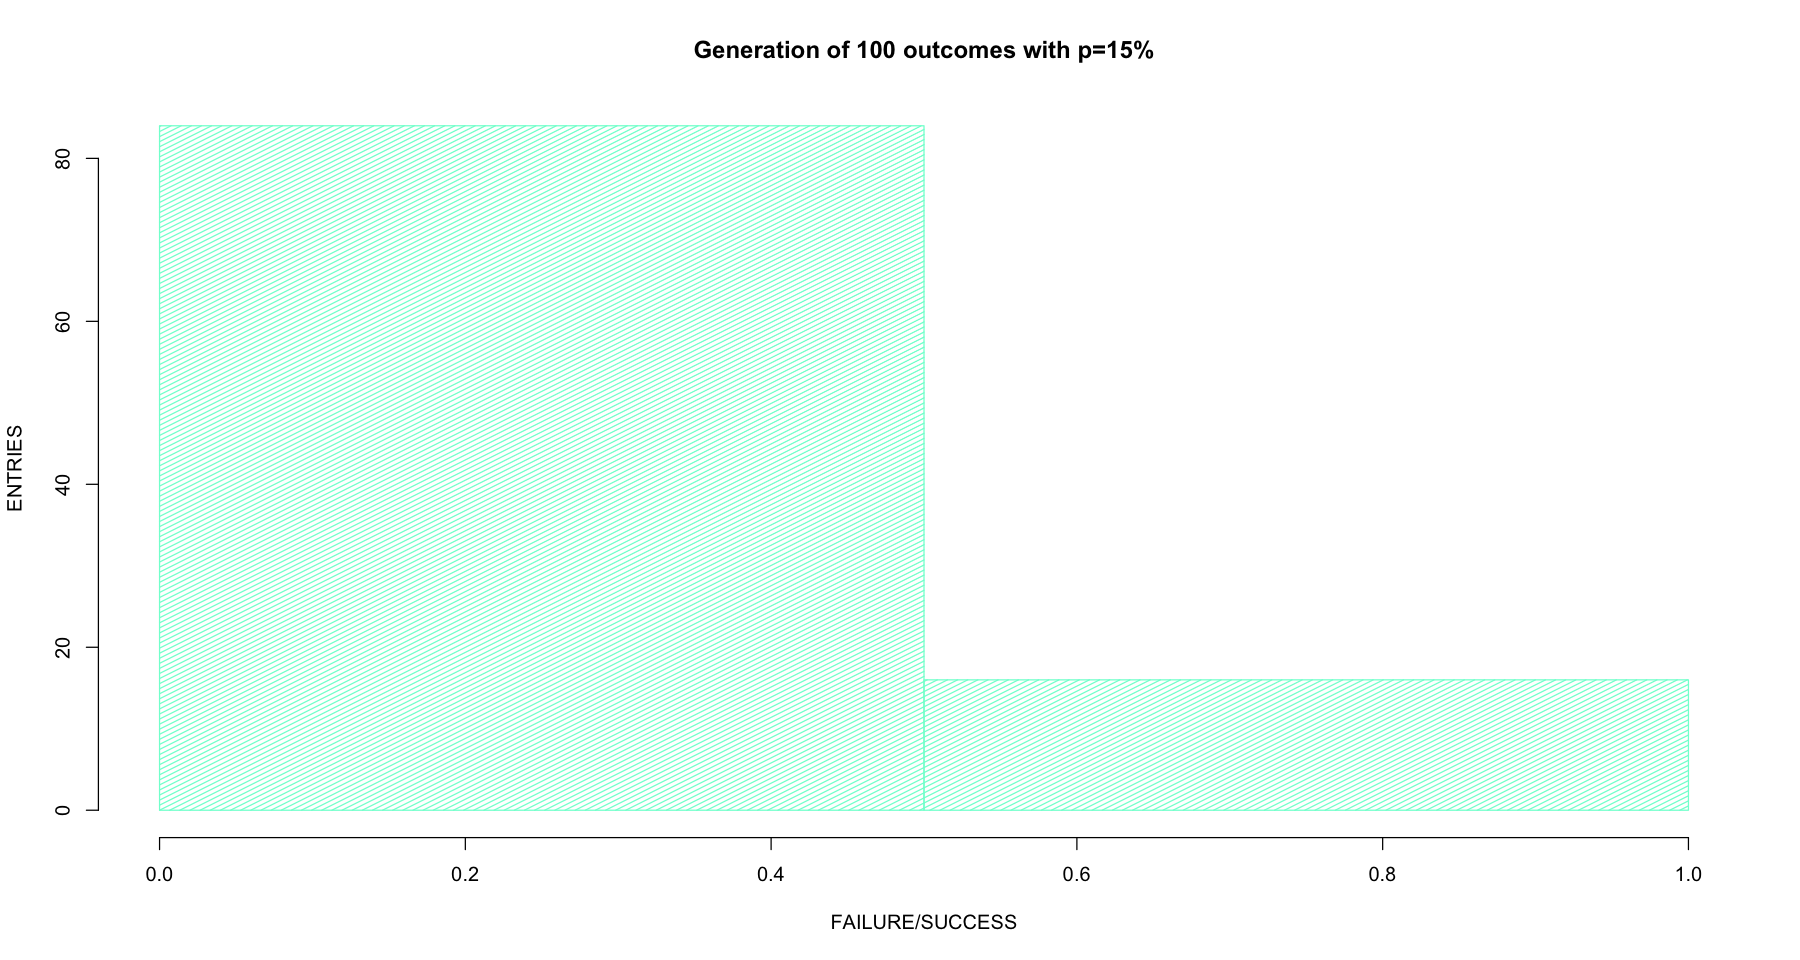

In [378]:
#generation 100 outcomes p=15%

set.seed(202220519)

data_size<-100
data_p<-0.15
data_plot<-TRUE
data_obs<- rbinom(data_size,size=1, data_p)

hist(data_obs,
     br=c(0,0.5,1),
     density=40,
     col="aquamarine",
     xlab="FAILURE/SUCCESS", 
     ylab="ENTRIES",
     main="Generation of 100 outcomes with p=15%")


In [359]:
#the bugs model
cat("model {

for (i in 1: length(X)) {
X[i] ~ dbern(p) }
p ~ dbeta(1, 1)

y ~ dbin(p, n_next) }",file="bern.bug")

In [360]:
# a list with the data for the model :
data<- NULL
data$X<- data_obs
data$n_next<-10

# the model is created passing the BUGS data file and a list with all the data and model parameters
jm <- jags.model(file = "bern.bug", data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 100
   Unobserved stochastic nodes: 2
   Total graph size: 104

Initializing model



In [362]:
# Update the Markov chain (Burn-in)
update(jm, 10000)
chain <- coda.samples(jm, c("p", "y"), n.iter=10000) 
cat("=========================================================","\n")

cat("JAGS results:","\n")

cat("=========================================================","\n")
print(summary(chain))

JAGS results: 

Iterations = 30001:40000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

    Mean      SD  Naive SE Time-series SE
p 0.1666 0.03706 0.0003706      0.0003706
y 1.6766 1.22693 0.0122693      0.0122693

2. Quantiles for each variable:

    2.5%    25%    50%    75%  97.5%
p 0.1008 0.1402 0.1641 0.1907 0.2446
y 0.0000 1.0000 2.0000 2.0000 4.0000




 Correlation matrix: 
          p         y
p 1.0000000 0.2956622
y 0.2956622 1.0000000


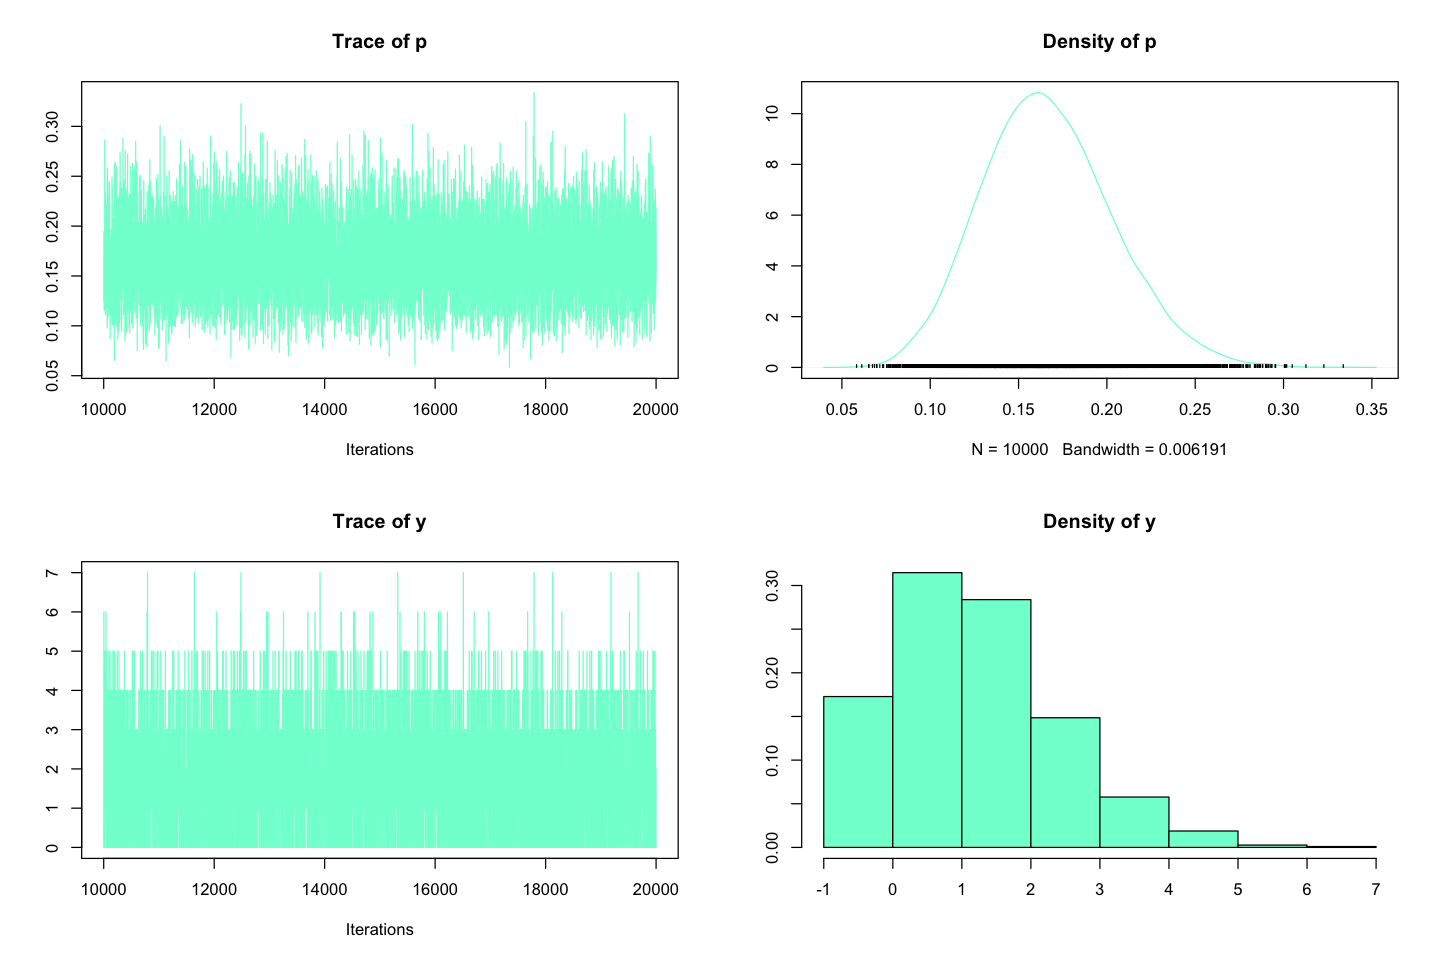

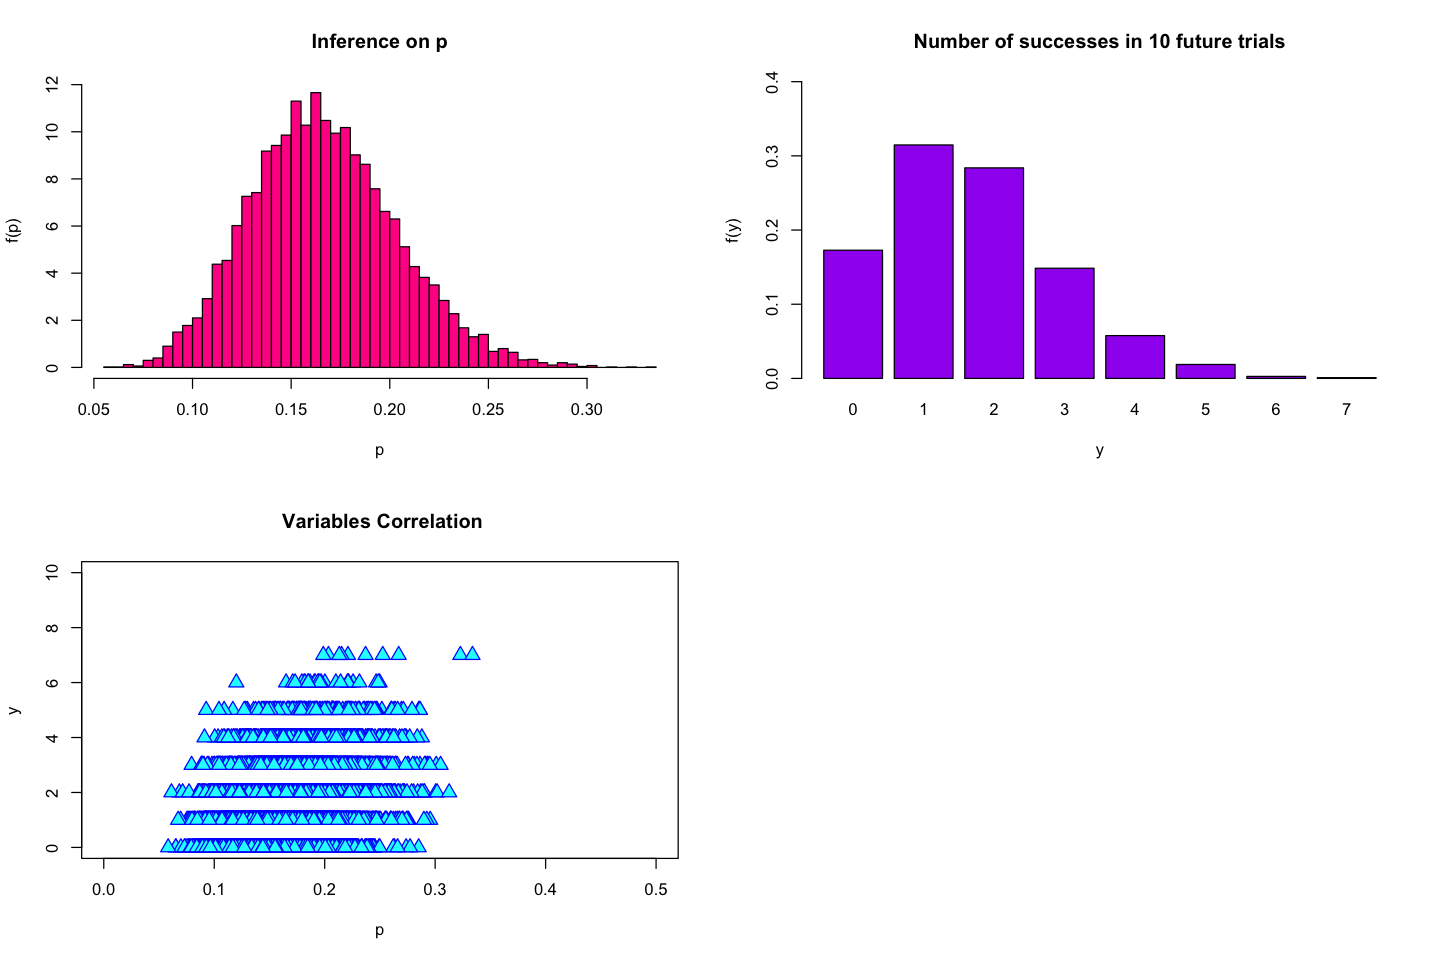

In [327]:
options(repr.plot.width=12, repr.plot.height=8)
par(mfrow=c(2,2))

plot(chain, col="Aquamarine",type="l",lwd=1)

# Let’s format our chain
chain.df <- as.data.frame( as.mcmc(chain) )
cat(sprintf("\n Correlation matrix: \n")) 
print(cor(chain.df))

# p inference result

hist(chain.df$p,
     nc=50,
     prob=TRUE,
     col="deeppink",
     xlab="p",
     ylab="f(p)",
     main="Inference on p")

# next data prediction probability
ty <- table(chain.df$y)

barplot(ty/sum(ty),
        col="Purple ",
        xlab='y',
        ylab='f(y)',
        ylim=c(0,0.40),
        main=sprintf('Number of successes in %d future trials', data$n_next))

# Correlation between p and predicted variable

plot(chain.df$p,
     chain.df$y,
     xlab='p',
     ylab='y',
     main=" Variables Correlation",
     pch= 24,
     col="blue",
     bg="cyan",
     cex=1.5,
     xlim=c(0,0.5),
     ylim=c(0,10))




### Point b: $n$=75 $y$=6

In [364]:
n = 75 # sample size
y = 6 # number of successes


#model
model_string <- "model{

  # Likelihood
  y ~ dbinom(p, n)

  # Prior
  p ~ dbeta(alpha, beta)
  alpha <- 3237/3920 # prior successes
  beta <- 18343/3920 # prior failures

}"


# list with data for the model
dataList = list(y = y, n = n)

model <- jags.model(file = textConnection(model_string), 
                    data = dataList)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model



In [365]:
# Update the Markov chain (Burn-in)
update(model, n.iter = 10000)

Nrep = 10000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("p"),
                       n.iter = Nrep)

Nrep = 10000 # number of values to simulate

cat("=========================================================","\n")

cat("JAGS results:","\n")

cat("=========================================================","\n")

summary(posterior_sample)

JAGS results: 



Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0852875      0.0320089      0.0003201      0.0004573 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.03387 0.06204 0.08165 0.10411 0.15865 


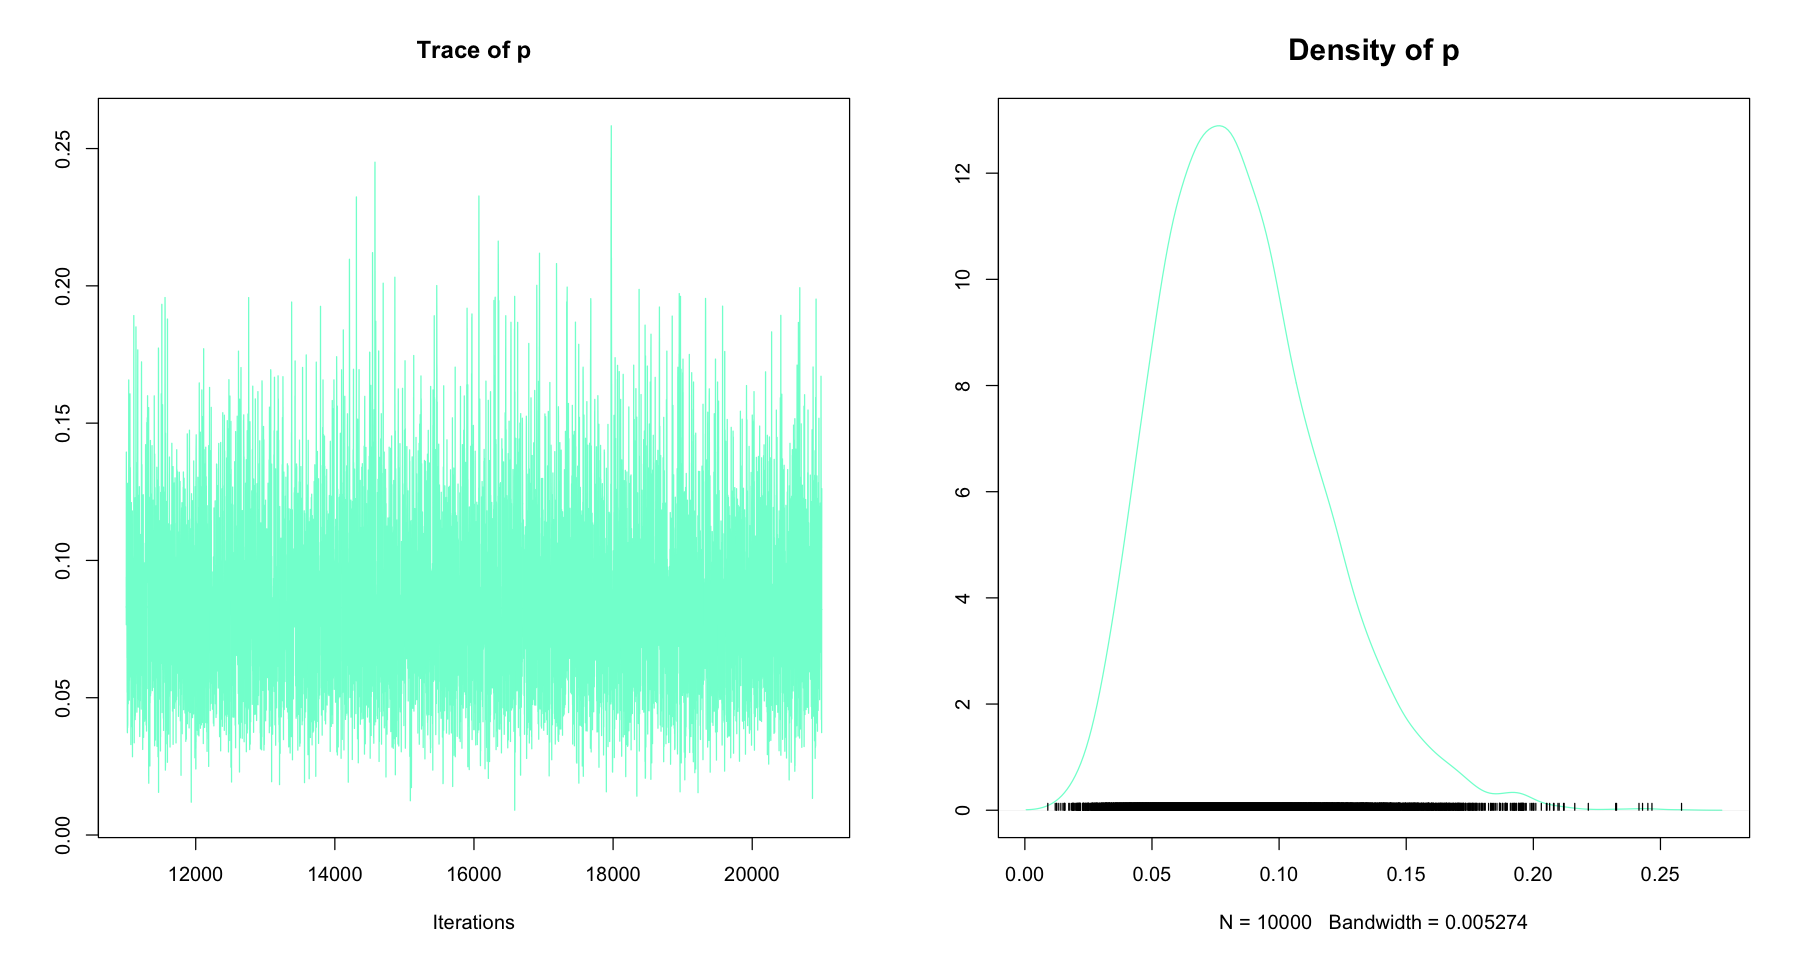

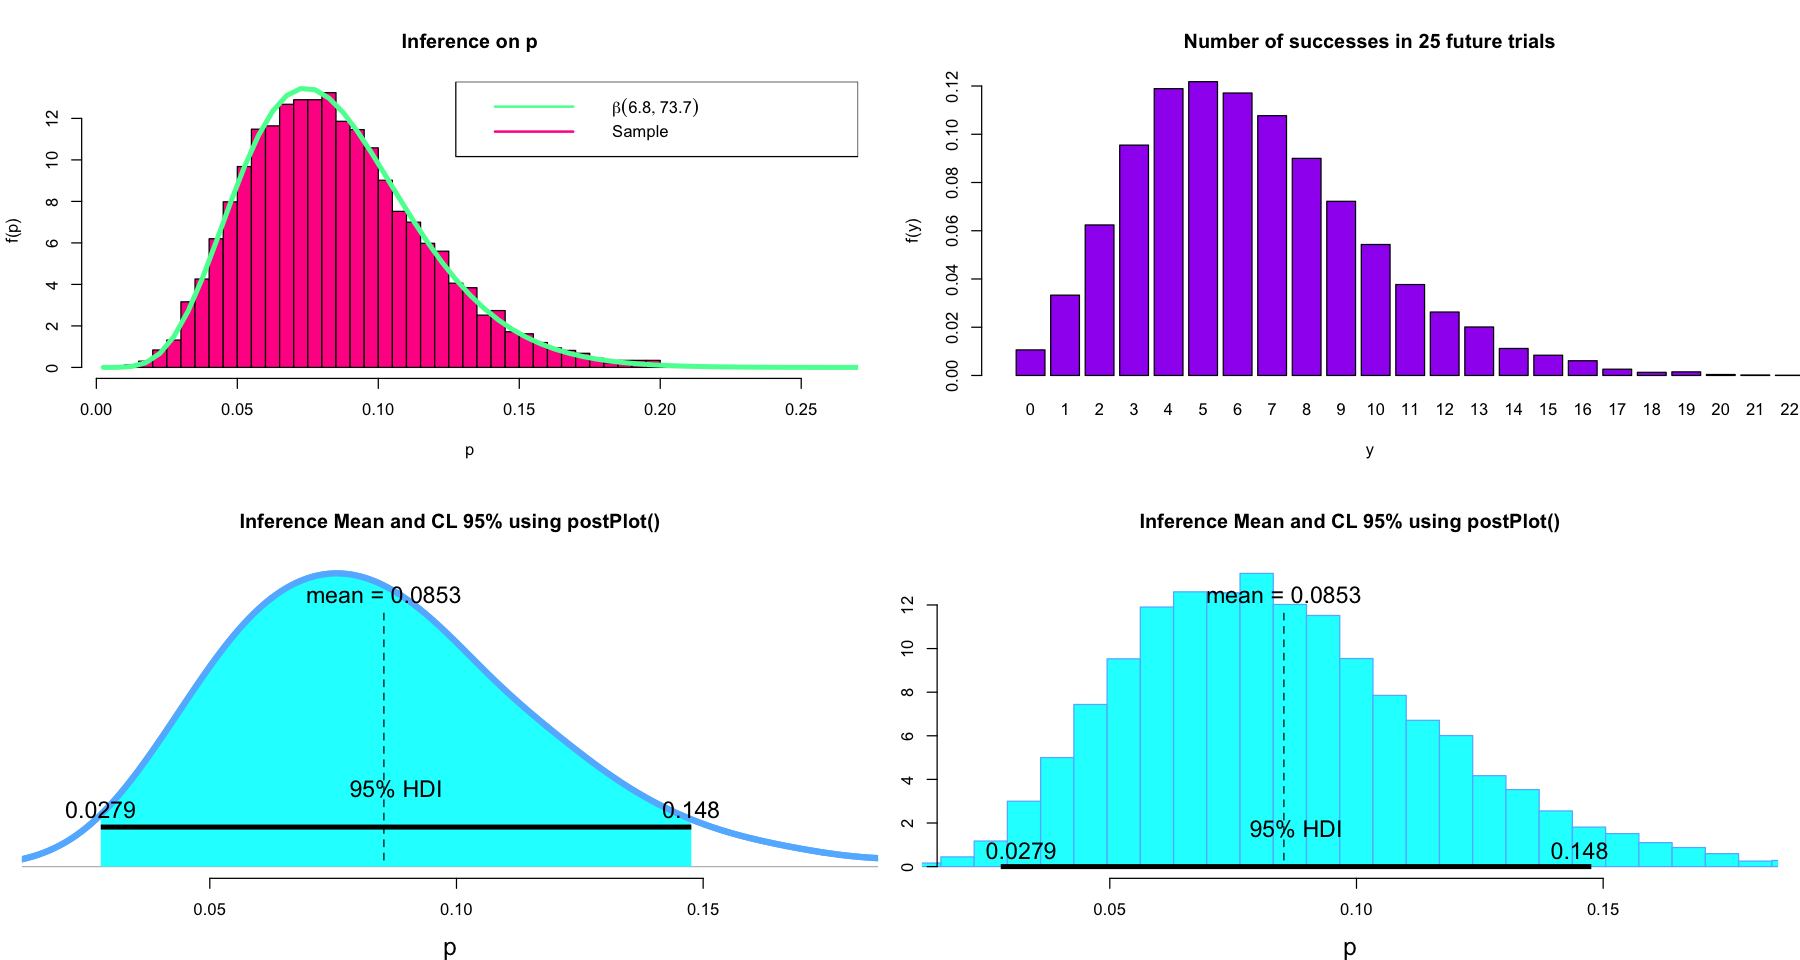

In [366]:
#values
a<- 3237/3920
b<- 18343/3920
n=75
y=6
n.sample<-200
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
#posterior
a1=a+y
b1=b+n-y
post.beta<-dbeta(x=p,a1,b1)


#plot the result
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(2,2))

plot(posterior_sample,
     col="Aquamarine",
     type="l",
     lwd=1,
     cex.main=1.5)

#convert to plot histo
ps = as.matrix(posterior_sample)


hist(ps, nc=50, prob=TRUE, col="deeppink",
xlab="p", ylab="f(p)", main="Inference on p")
lines(p,post.beta,col="seagreen1",lwd=4)
#legend
legend(x = "topright",
       col = c("seagreen1", "deeppink"),
       lty = 1,
       lwd = 2,
       legend = c(expression( symbol(b)(6.8,73.7)),"Sample")) 


# next data prediction probability
ynew = rbinom(Nrep, n, ps)
barplot(table(ynew)/sum(table(ynew)),
        col="Purple ",
        xlab='y',
        ylab='f(y)',
        xlim=c(0,25),
        main=sprintf('Number of successes in 25 future trials'))

#plot with usefull info using postPlot
postPlot(posterior_sample,
         layout=c(3,3),
         center = c("mean", "median", "mode"),
         CRImass=0.95,
         compVal = NULL,
         ROPE = NULL,
         HDItextPlace = 0.7,
         showCurve = TRUE,
         shadeHDI = "cyan",
         main="Inference Mean and CL 95% using postPlot()",
         col="steelblue1",cex.main=1.2)


#plot with usefull info using postPlot
postPlot(posterior_sample,
         layout=c(3,3),
         center = c("mean", "median", "mode"),
         CRImass=0.95,
         compVal = NULL, ROPE = NULL,
         HDItextPlace = 0.7,
         showCurve = FALSE,
         shadeHDI = NULL,
         main="Inference Mean and CL 95% using postPlot()",
         col="cyan",
         border="steelblue1",
         cex.main=1.2)
Axis(side=2,pos=0.015,labels=TRUE,ylab="dd")



# EXERCISE 5

## • Analyze the data of Exercise 2 using a MCMC with JAGS

### Uniform Prior

In [367]:
#data
y <- c(0,1,2,3,4,5)
n1 <- c(109,65,22,3,1,0)
n2 <- c(144,91,32,11,2,0)
n_tot <- n1 + n2
data_obs <- rep(y , n_tot)
data <- NULL
data$X <- data_obs


#model
model_string <- "model{

#data likelihood

for (i in 1:length(X)){
    X[i] ~ dpois(lambda);
}

#Prior for lambda

lambda ~ dexp(0.000001);

# Predicted data , given lambda


}"



jm <- jags.model(file = textConnection(model_string), data=data)


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 480
   Unobserved stochastic nodes: 1
   Total graph size: 482

Initializing model



In [368]:
# Update the Markov chain (Burn -in)
update (jm , 10000)
chain <- coda.samples(jm , c("lambda"), n.iter=10000)

cat("=========================================================","\n")

cat("JAGS results:","\n")

cat("=========================================================","\n")

summary(chain)


JAGS results: 



Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6642508      0.0371304      0.0003713      0.0003713 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5939 0.6386 0.6639 0.6890 0.7386 


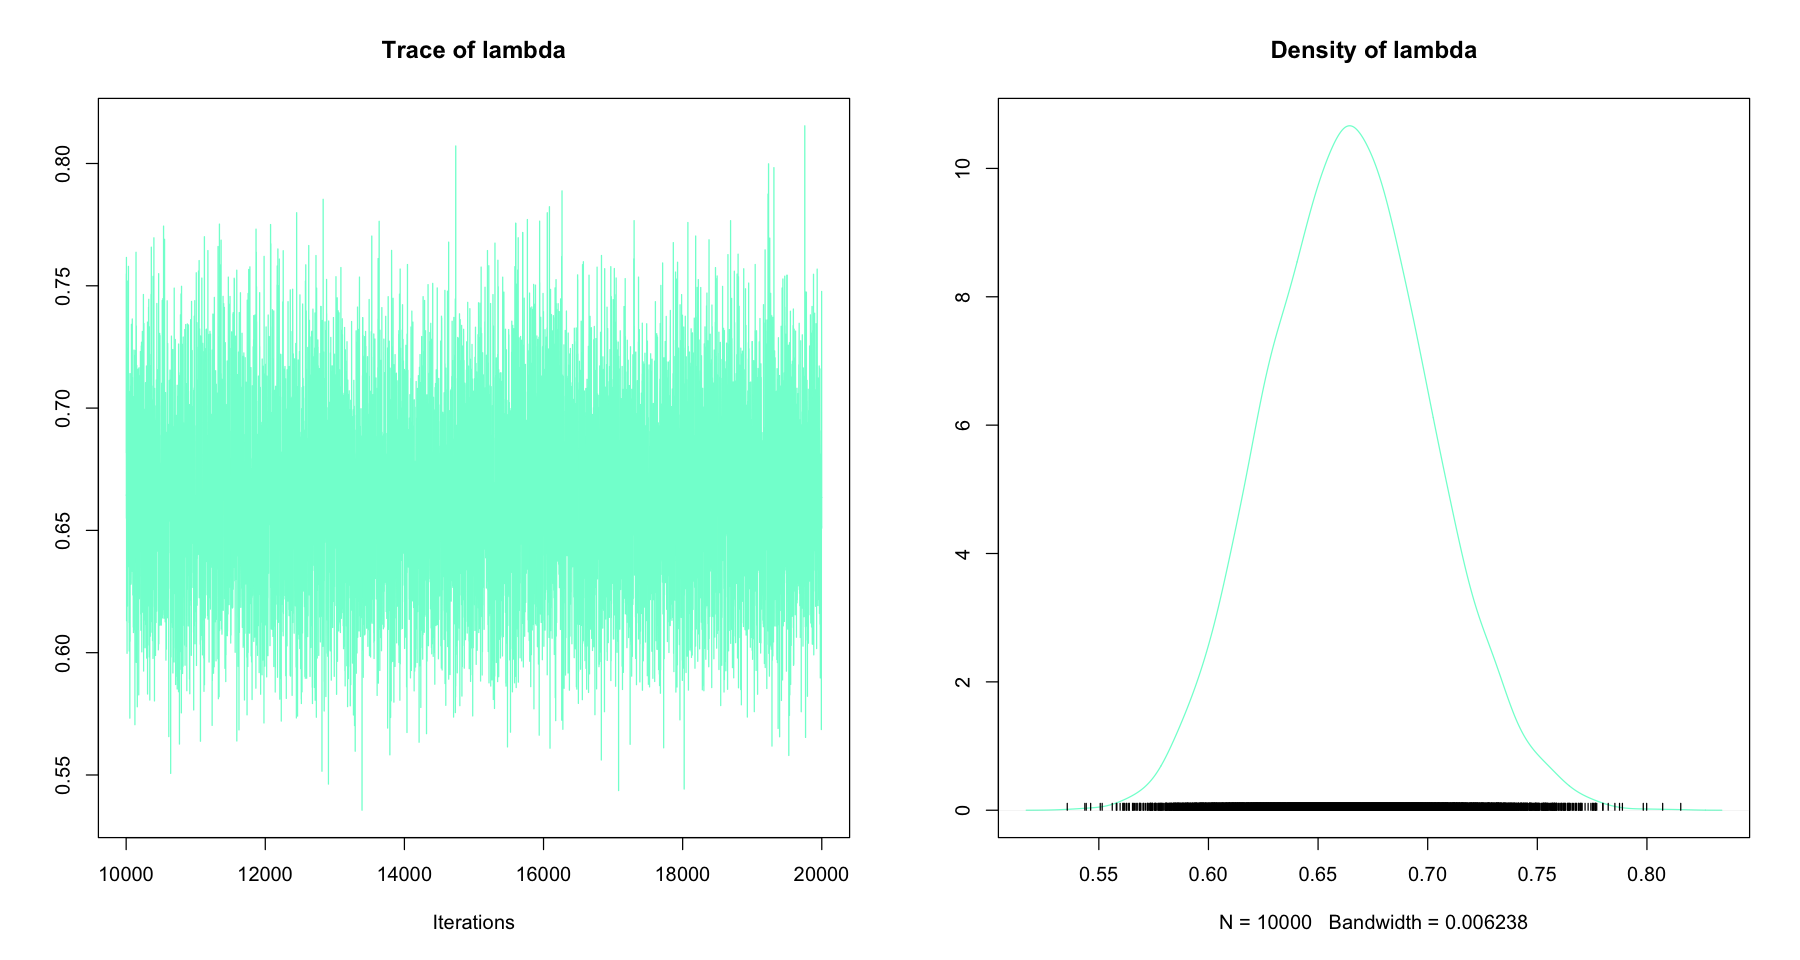

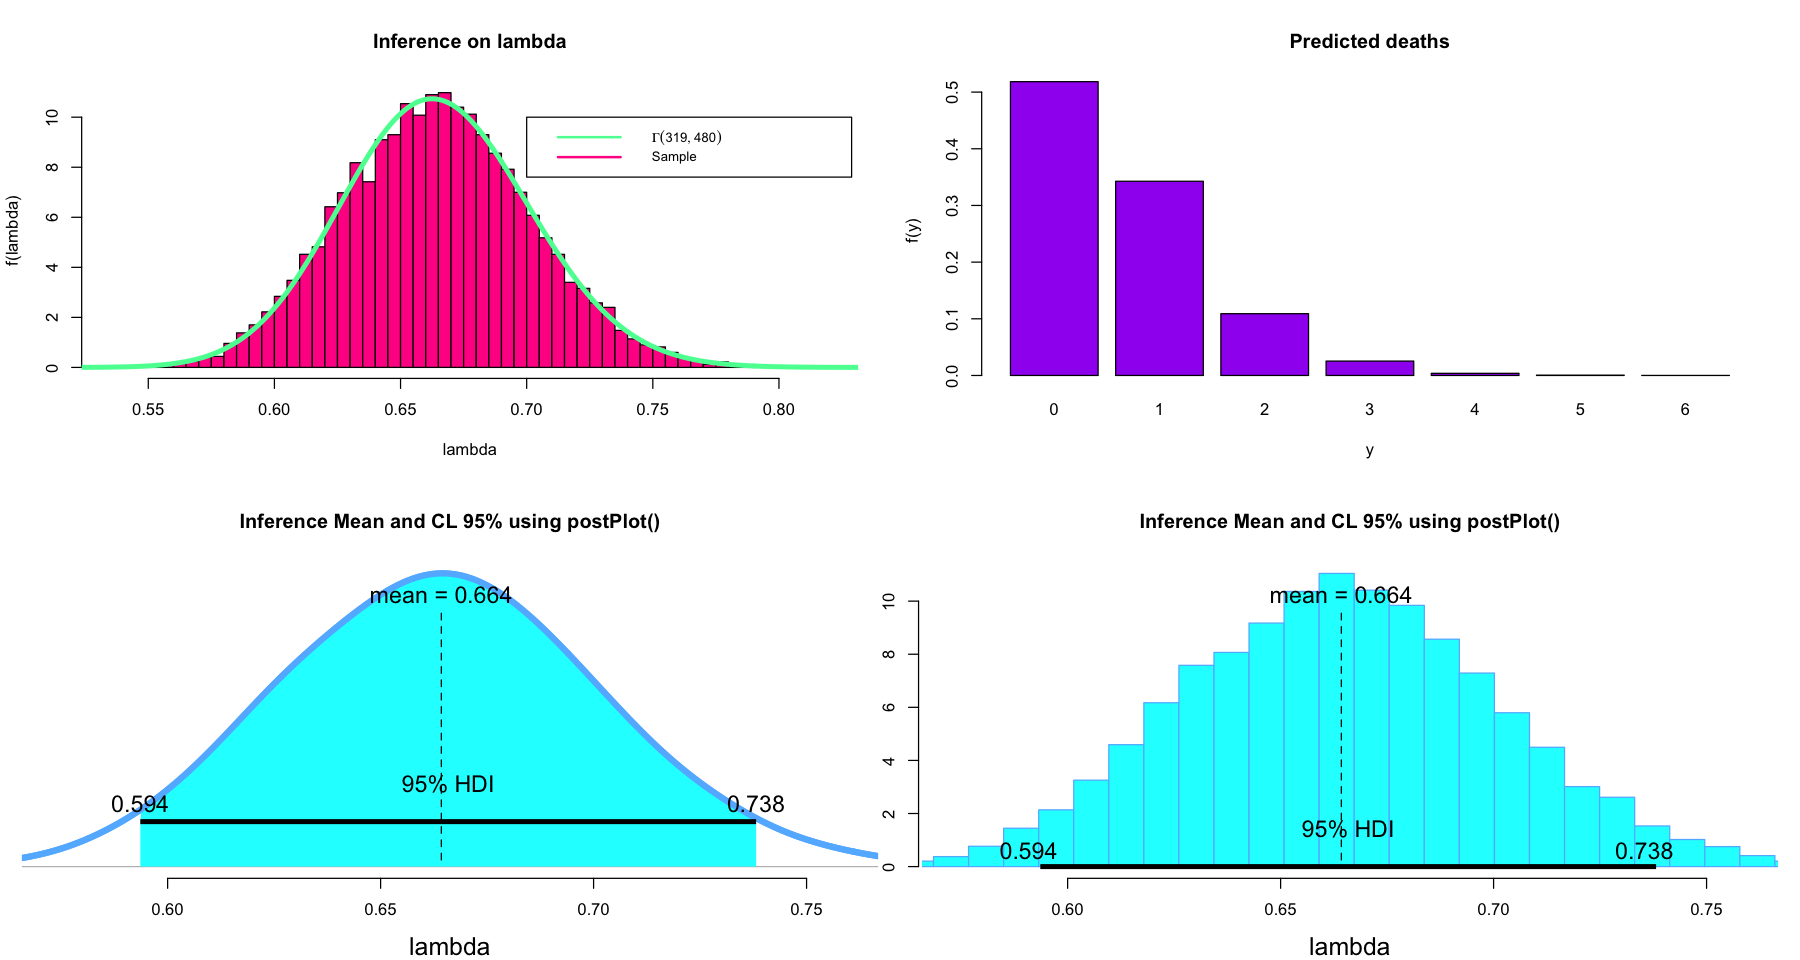

In [369]:
#posterior
alpha<- sum(deaths*(n1 + n2)) + 1
beta<- sum(n1 + n2)
p<-seq(0,1,0.001)
post.beta<-dgamma(p,alpha,beta)

options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(2,2))

plot(chain,
     col="Aquamarine",
     type="l",
     lwd=1)

# Let’s format our chain
chain.df <- as.data.frame( as.mcmc(chain) )

# lambda inference result
hist(chain.df$lambda,
     nc=50,
     prob=TRUE,
     col="deeppink",
     xlab="lambda",
     ylab="f(lambda)",
     main="Inference on lambda")
lines(p,post.beta,col="seagreen1",lwd=4)
#legend
legend(x = 0.7,
       y=10,
       cex=0.8,
       col = c("seagreen1", "deeppink"),
       lty = 1,
       lwd = 2,
       legend = c(expression( symbol(G)(319,480)),"Sample")) 



# next data prediction probability
lambs = as.matrix(chain)
lnew = rpois(Nrep,lambs)
barplot(table(lnew)/sum(table(lnew)),
        col="Purple ",
        xlab='y',
        ylab='f(y)',
        main=sprintf('Predicted deaths'))


#plot with usefull info using postPlot
postPlot(chain,
         layout=c(3,3),
         center = c("mean", "median", "mode"),
         CRImass=0.95,
         compVal = NULL,
         ROPE = NULL,
         HDItextPlace = 0.7,
         showCurve = TRUE,
         shadeHDI ="cyan",
         main="Inference Mean and CL 95% using postPlot()",
         col="steelblue1",
         cex.main=1.2)



#plot with usefull info using postPlot
postPlot(chain,
         layout=c(3,3), 
         center = c("mean", "median", "mode"),
         CRImass=0.95,
         compVal = NULL,
         ROPE = NULL,
         HDItextPlace = 0.7,
         showCurve = FALSE,
         shadeHDI = "cyan",
         main="Inference Mean and CL 95% using postPlot()",
         col="cyan",
         border="steelblue1",
         cex.main=1.2)
Axis(side=2,pos=0.565,labels=TRUE)


### Jeffrey's Prior

In [370]:
#model
model_string <- "model{

#data likelihood

for (i in 1:length(X)){
    X[i] ~ dpois(lambda);
}

#Prior for lambda

lambda ~ dbeta(1/2,1/2);

}"



jm <- jags.model(file = textConnection(model_string), data=data)



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 480
   Unobserved stochastic nodes: 1
   Total graph size: 484

Initializing model



In [371]:
# Update the Markov chain (Burn -in)
update (jm , 10000)
chain <- coda.samples(jm , c("lambda"), n.iter=10000)

cat("=========================================================","\n")

cat("JAGS results:","\n")

cat("=========================================================","\n")

summary(chain)

JAGS results: 



Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6657631      0.0377465      0.0003775      0.0004850 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5931 0.6399 0.6653 0.6911 0.7398 


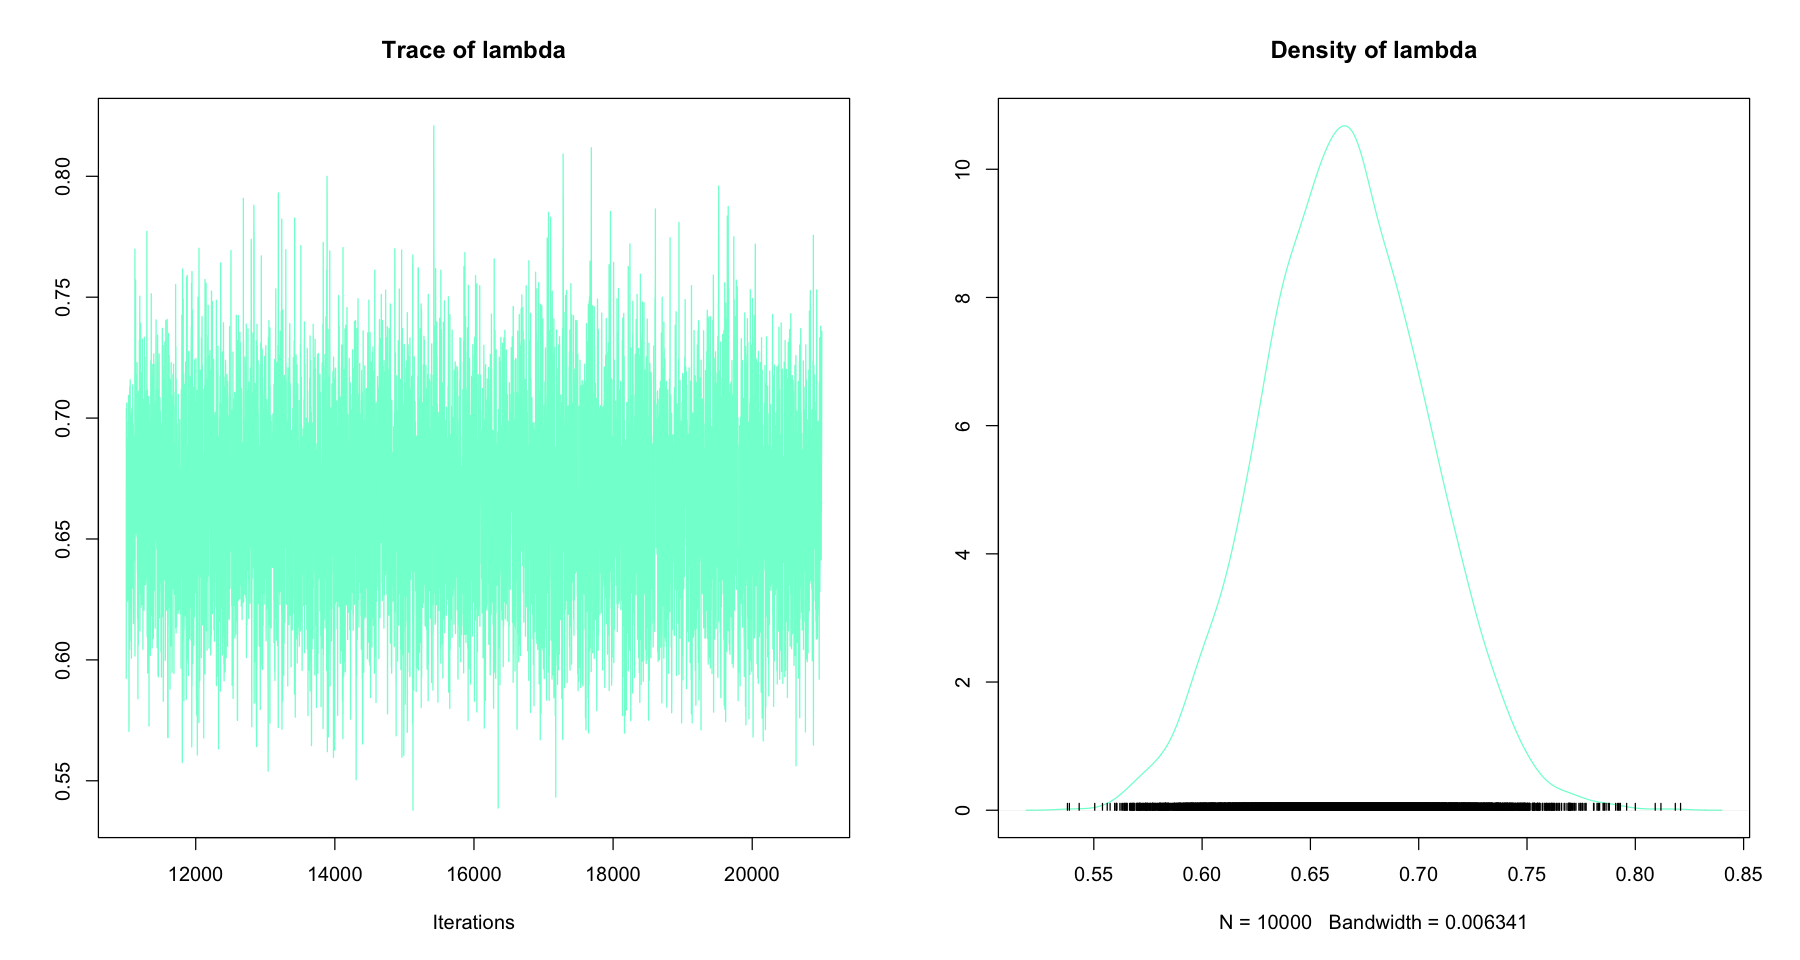

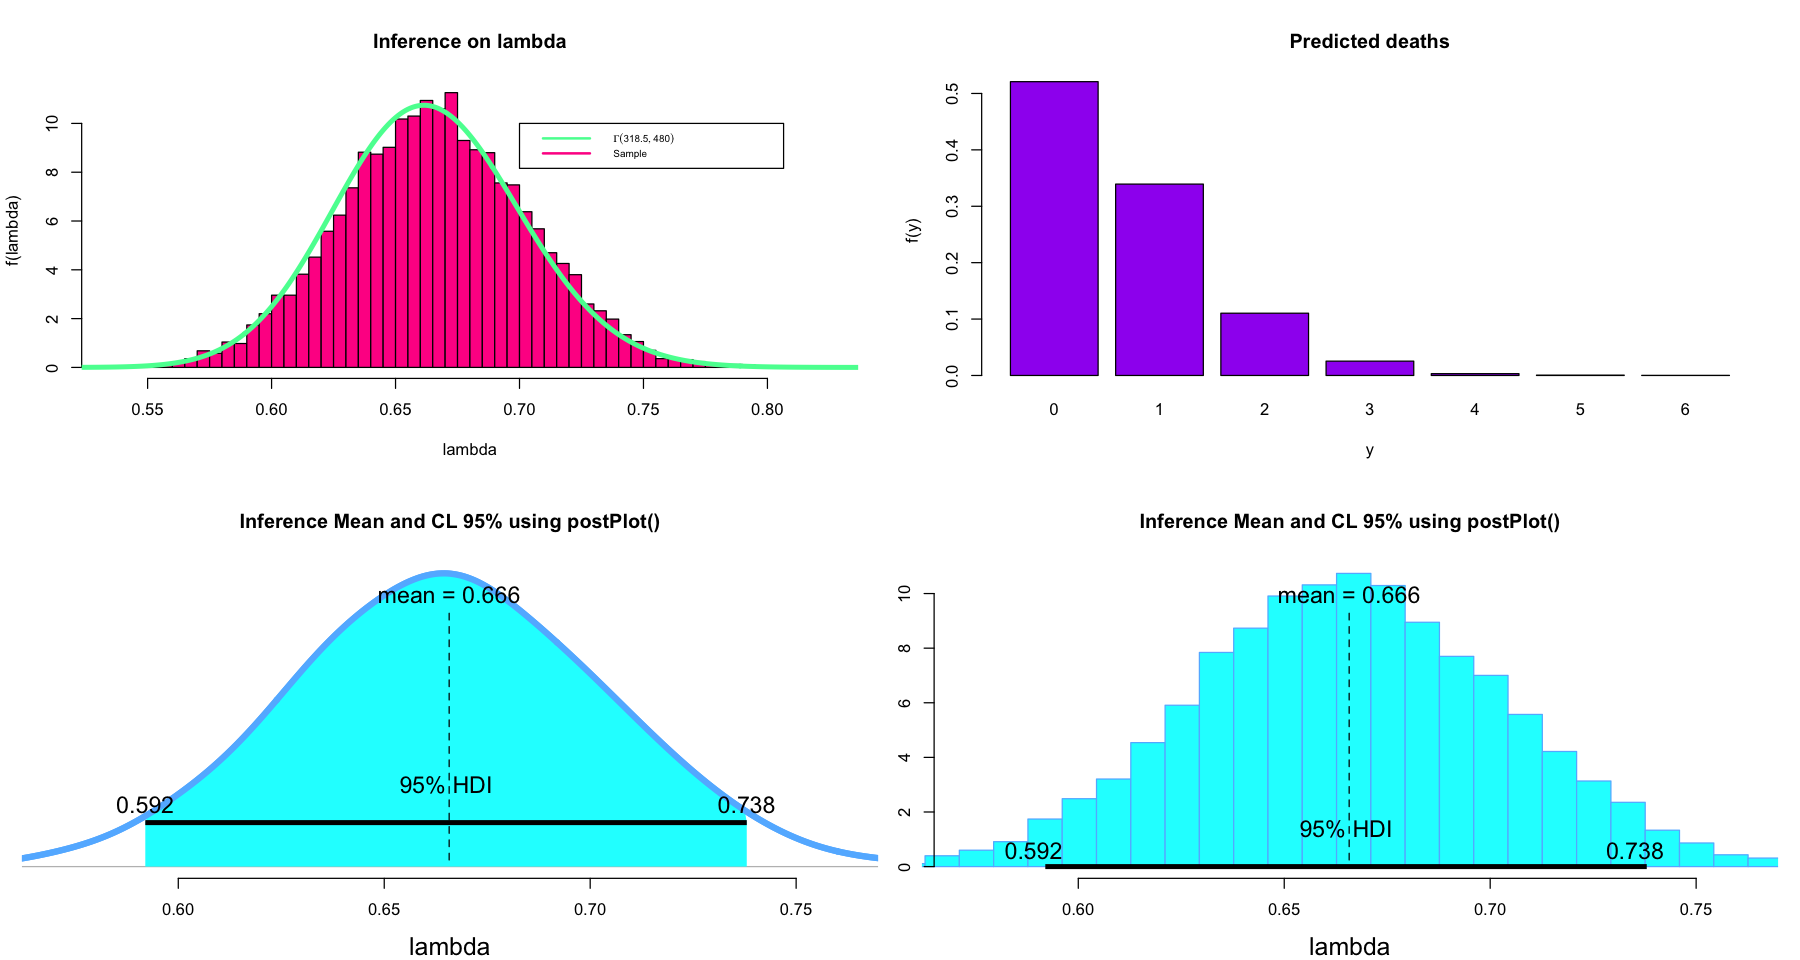

In [372]:
#posterior
alpha<- sum(deaths*(n1 + n2)) + 0.5
beta<- sum(n1 + n2)
p<-seq(0,1,0.001)
post.beta<-dgamma(p,alpha,beta)


options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(2,2))

plot(chain,
     col="Aquamarine",
     type="l",
     lwd=1)

# Let’s format our chain
chain.df <- as.data.frame( as.mcmc(chain) )

# lambda inference result
hist(chain.df$lambda,
     nc=50,
     prob=TRUE,
     col="deeppink",
     xlab="lambda",
     ylab="f(lambda)",
     main="Inference on lambda")
lines(p,post.beta,col="seagreen1",lwd=4)
#legend
legend(x = 0.7,
       y=10,
       cex=0.6,
       col = c("seagreen1", "deeppink"),
       lty = 1,
       lwd = 2,
       legend = c(expression( symbol(G)(318.5,480)),"Sample")) 



# next data prediction probability
lambs = as.matrix(chain)
lnew = rpois(Nrep,lambs)
barplot(table(lnew)/sum(table(lnew)),
        col="Purple ",
        xlab='y',
        ylab='f(y)',
        main=sprintf('Predicted deaths'))

#plot with usefull info using postPlot
postPlot(chain,
         layout=c(3,3),
         center = c("mean", "median", "mode"),
         CRImass=0.95,
         compVal = NULL,
         ROPE = NULL,
         HDItextPlace = 0.7,
         showCurve = TRUE,
         shadeHDI ="cyan",
         main="Inference Mean and CL 95% using postPlot()",
         col="steelblue1",
         cex.main=1.2)



#plot with usefull info using postPlot
postPlot(chain,
         layout=c(3,3), 
         center = c("mean", "median", "mode"),
         CRImass=0.95,
         compVal = NULL,
         ROPE = NULL,
         HDItextPlace = 0.7,
         showCurve = FALSE,
         shadeHDI = "cyan",
         main="Inference Mean and CL 95% using postPlot()",
         col="cyan",
         border="steelblue1",
         cex.main=1.2)
Axis(side=2,pos=0.565,labels=TRUE)

# EXERCISE 6

## • Analyze the data of Exercise 3 using a MCMC with JAGS (solve point b and c)

### $y=11 \ n=116 $

In [374]:
n = 116 # sample size
y = 11 # number of successes


#model
model_string <- "model{

  # Likelihood
  y ~ dbinom(p, n)

  # Prior
  p ~ dbeta(alpha, beta)
  alpha <- 1 # prior successes
  beta <- 10 # prior failures

}"

# list with data for the model
dataList = list(y = y, n = n)

model <- jags.model(file = textConnection(model_string), 
                    data = dataList)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model



In [375]:
# Update the Markov chain (Burn-in)
update(model, n.iter = 10000)

Nrep = 10000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("p"),
                       n.iter = Nrep)

Nrep = 10000 # number of values to simulate

cat("=========================================================","\n")

cat("JAGS results:","\n")

cat("=========================================================","\n")

summary(posterior_sample)

JAGS results: 



Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0946490      0.0256521      0.0002565      0.0003549 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05106 0.07647 0.09212 0.11055 0.15200 


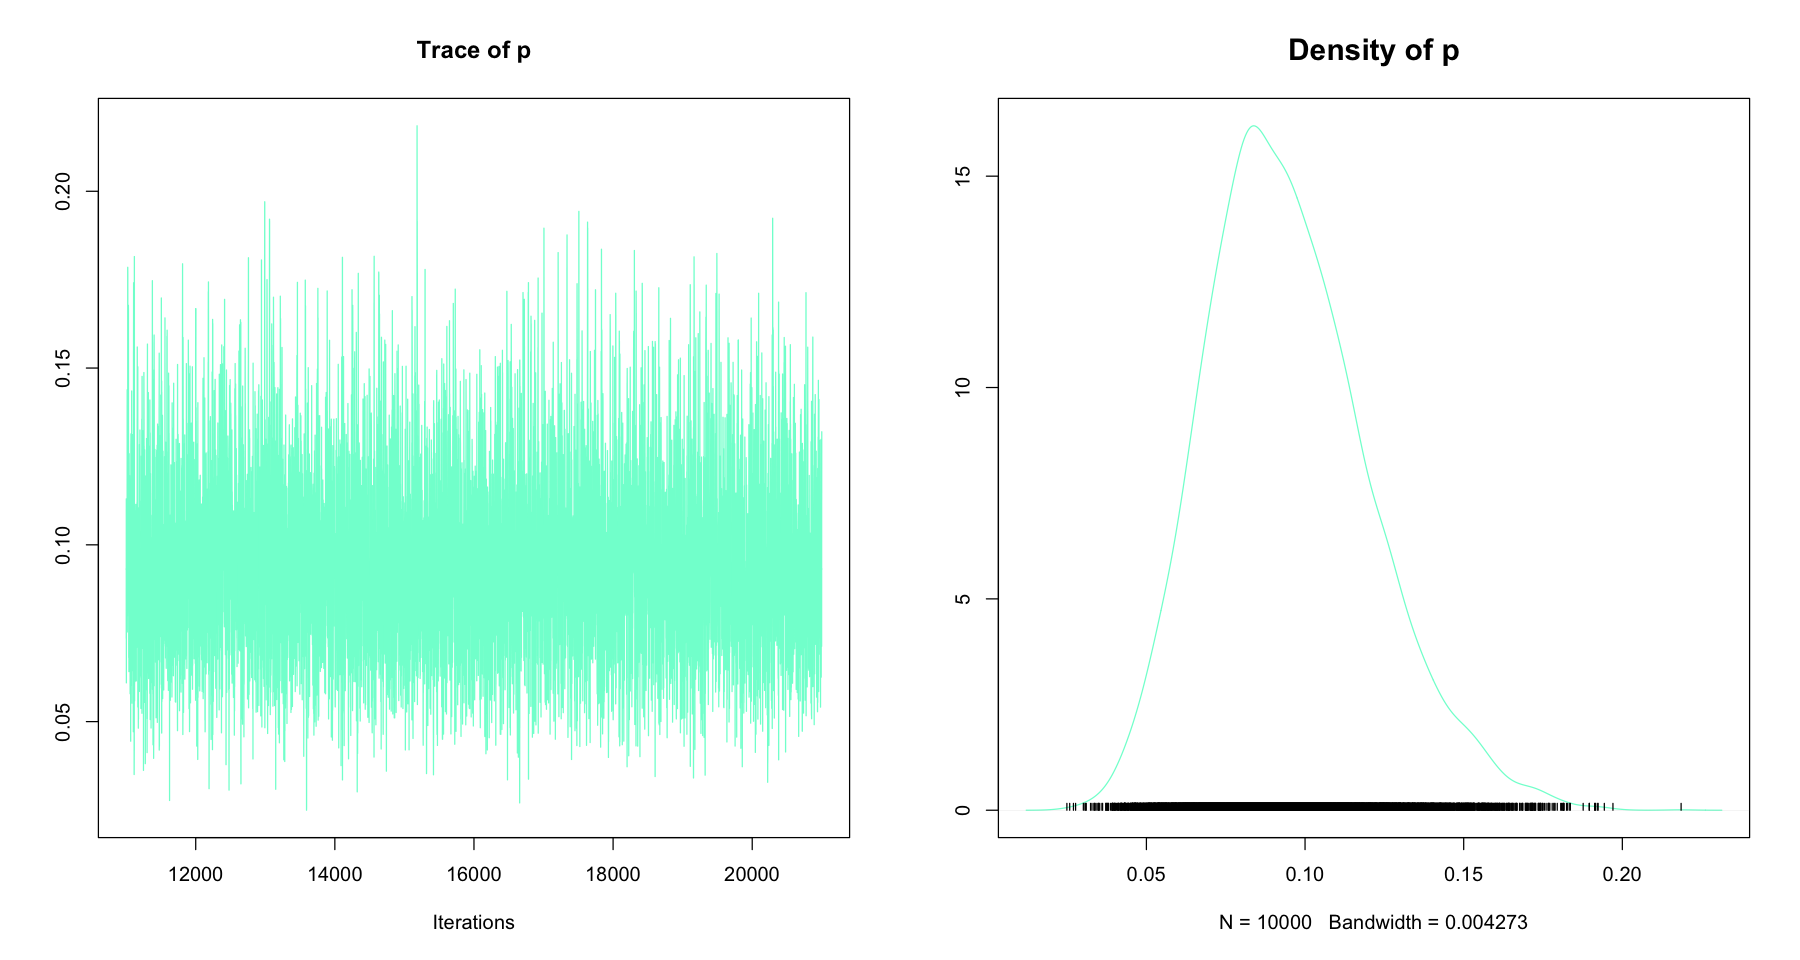

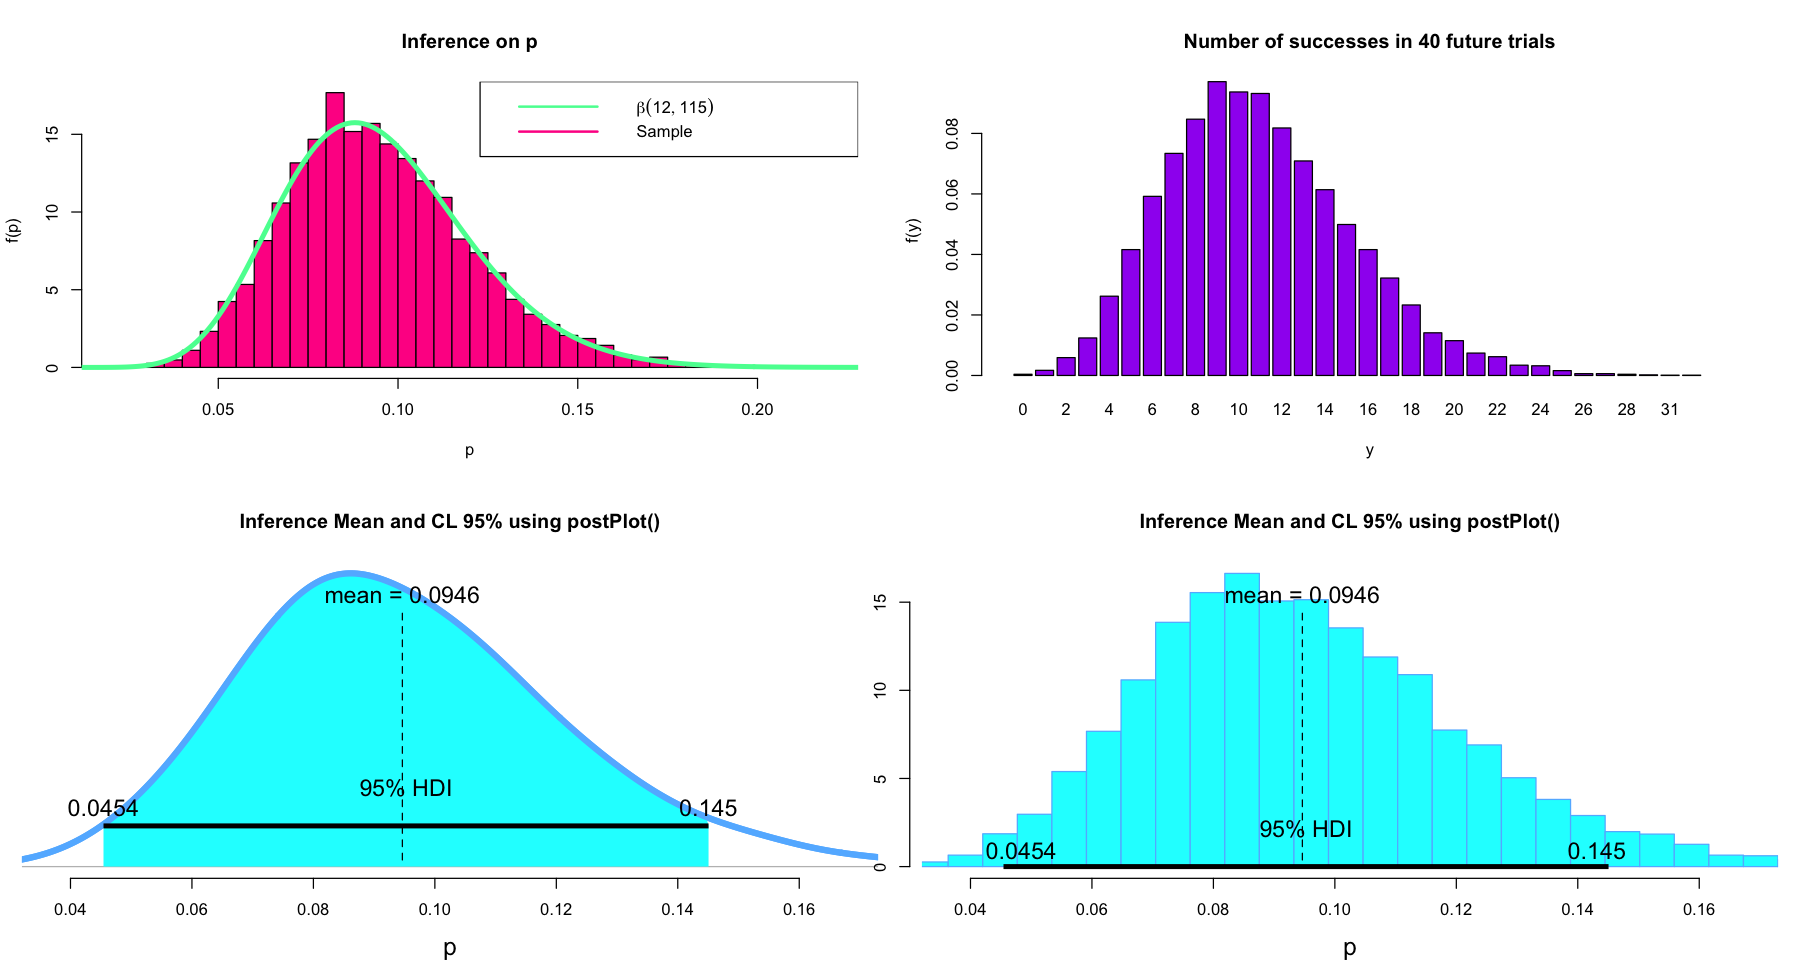

In [376]:
#posterior
aw<-1
bw<-10
y<-11
n<-116
aw1<-aw+y
bw1<-bw+116-y
p<-seq(0,0.25,0.001)
post.beta<-dbeta(p,aw1,bw1)


#plot the result
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(2,2))

plot(posterior_sample,
     col="Aquamarine",
     type="l",
     lwd=1,
     cex.main=1.5)

#convert to plot histo
ps = as.matrix(posterior_sample)


hist(ps,
     nc=50,
     prob=TRUE,
     col="deeppink",
     xlab="p",
     ylab="f(p)",
     main="Inference on p")
lines(p,post.beta,col="seagreen1",lwd=4)
#legend
legend(x = "topright",
       col = c("seagreen1", "deeppink"),
       lty = 1,
       lwd = 2,
       legend = c(expression( symbol(b)(12,115)),"Sample")) 


# next data prediction probability
ynew = rbinom(Nrep, n, ps)
barplot(table(ynew)/sum(table(ynew)),
        col="Purple ", 
        xlab='y',
        ylab='f(y)',
        xlim=c(0,40),
        main=sprintf('Number of successes in 40 future trials'))

#plot with usefull info using postPlot
postPlot(posterior_sample,
         layout=c(3,3),
         center = c("mean", "median", "mode"),
         CRImass=0.95,
         compVal = NULL,
         ROPE = NULL,
         HDItextPlace = 0.7,
         showCurve = TRUE,
         shadeHDI ="cyan",
         main="Inference Mean and CL 95% using postPlot()",
         col="steelblue1",
         cex.main=1.2)



#plot with usefull info using postPlot
postPlot(posterior_sample,
         layout=c(3,3), 
         center = c("mean", "median", "mode"),
         CRImass=0.95,
         compVal = NULL,
         ROPE = NULL,
         HDItextPlace = 0.7,
         showCurve = FALSE,
         shadeHDI = "cyan",
         main="Inference Mean and CL 95% using postPlot()",
         col="cyan",
         border="steelblue1",
         cex.main=1.2)
Axis(side=2,pos=0.03,labels=TRUE)
